# Wine Class Predicition

In this project we will be analysing the winedataset dataset and build a predictive model that can predict the 'Class' of the wine. 

Dataset from : https://github.com/dsrscientist/dataset1

There are 13 independent variables in the dataset. The following are the independent variables of the dataset.

    1. Alcohol
    2. Malic acid
    3. Ash
    4. Alcalinity of ash
    5. Magnesium
    6. Total phenols
    7. Flavanoids
    8. Nonflavanoid phenols
    9. Proanthocyanins
    10.Color intensity
    11.Hue
    12.diluted wines
    13.Proline
    
The target variable is the 'Class' variable in the dataset. The Class variable has three categories in it. Class '1', '2' and '3'.

Problem: Classification problem


### Importing libraries

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import f_oneway

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings

warnings.simplefilter('ignore')

In [79]:
df = pd.read_csv('./data/winedataset.csv')
df.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  diluted wines  Proline      
0             5.64  1.04           3.92         1065  
1             4.38  1.05           3.40         1050  
2             5.68  1.03           3.17         1185  
3             7.80  0.86           3.45         1480  
4             4.32  1.04           2.93          735

In [80]:
df.shape

(178, 14)

Observation:

There are 178 rows and 14 columns in the dataset

In [81]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [82]:
df.rename(columns={'Malic acid':'malic_acid','Proline    ':'Proline','Alcalinity of ash':'Alcalinity_of_ash',
                  'Total phenols':'Total_phenols', 'Nonflavanoid phenols':'Nonflavanoid_phenols',
                  'Color intensity':'Color_intensity', 'diluted wines':'diluted_wines'},inplace=True)

### Finding Missing values

In [83]:
df.isnull().sum()

Class                   0
Alcohol                 0
malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
diluted_wines           0
Proline                 0
dtype: int64

Observation:

There are no missing values in the dataset. Hence we don't need to handle missing values.

### Datatypes

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted_wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Observation:

All the variables are continuous variable. Only the 'Class'(target) variable is categorical

### Descriptive statistical analysis

In [85]:
df.describe()

Class     Alcohol  malic_acid         Ash  Alcalinity_of_ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total_phenols  Flavanoids  Nonflavanoid_phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color_intensity         Hue  diluted_wines  \
count       178.000000       178.000000  178.000000     178.000000   
mean          1.590899         5.058090    0.957449       2.611685   
std           0.572359         2.318286    0.228572       0.709990   
min           0.410000         1.280000    0.480000       1.270000   
25%           1.250000         3.220000    0.782500       1.937500   
50%           1.555000         4.690000    0.965000       2.780000   
75%           1.950000         6.200000    1.120000       3.170000   
max           3.580000        13.000000    1.710000       4.000000   

           Proline  
count   178.000000  
mean    746.893258  
std     314.907474  
min     278.000000  
25%     500.500000  
50%     673.500000  
75%     985.000000  
max    1680.000000

Observations:

1. All the variables see to be almost normally distributed. All the values indicates that we may not need any data cleaning
2. The Proline variable is on a different scale compared to the other variables. Hence the mean seem to be slightly more distant(than the other variables) towards the right side of the median indicating a right skew. However this could just be because of the difference in the scale.
3. The standard deviation also indicates that the 'Proline' variables' spread is wider than the other variables.
4. 'Proline' Variable might also have some slight outliers since the max value is slightly farther than the mean than the min value is. Also there is a big gap bewtween the 75% and the max value.
5. 'Color intensity' Variable might also have some outliers since there is a gap between the 75th quartile and the max values


We will be further investigating these observations

### Exploratory Data Analysis

#### Univariate Analysis

In [86]:
df.columns

Index(['Class', 'Alcohol', 'malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'diluted_wines',
       'Proline'],
      dtype='object')

In [87]:
def dist_plot(data,col):
    plt.title(f'Comparing the distribution of {col} and a Normal Distribution.')
    plt.xlabel(col)
    sns.distplot(data[col], fit=norm)
    plt.show()

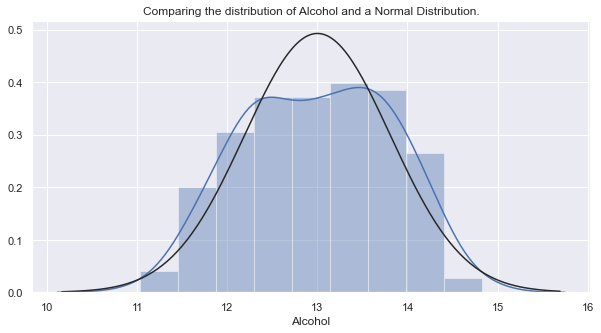

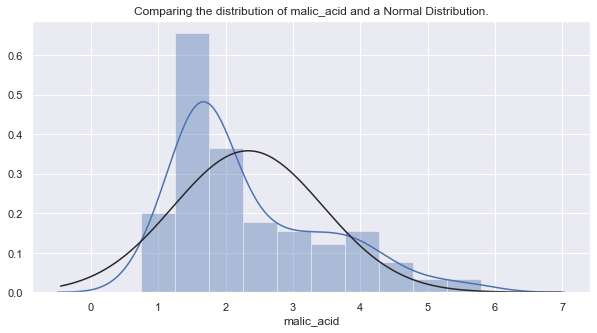

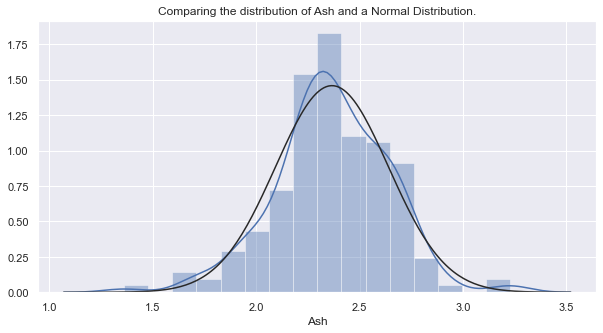

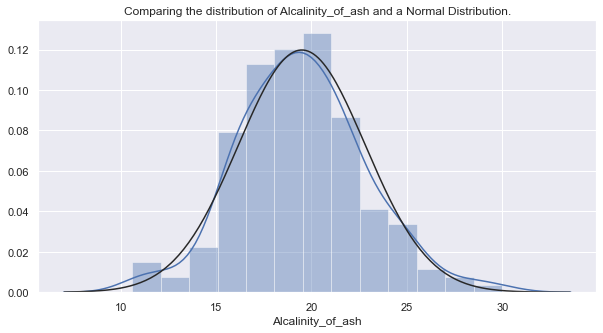

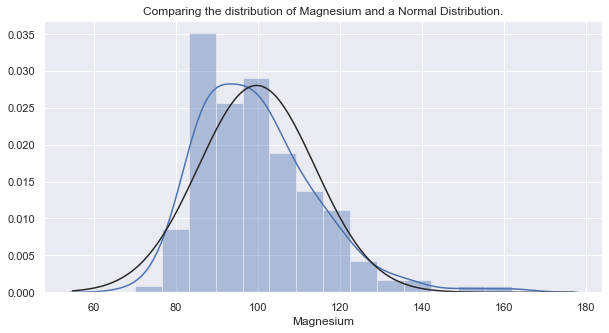

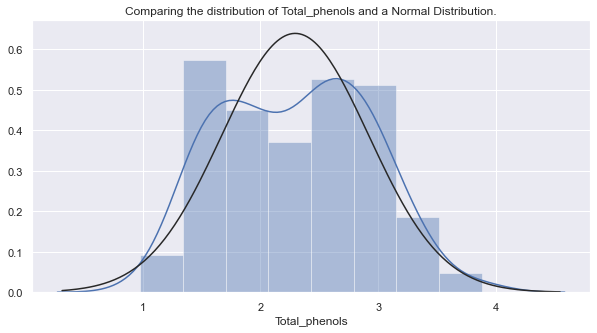

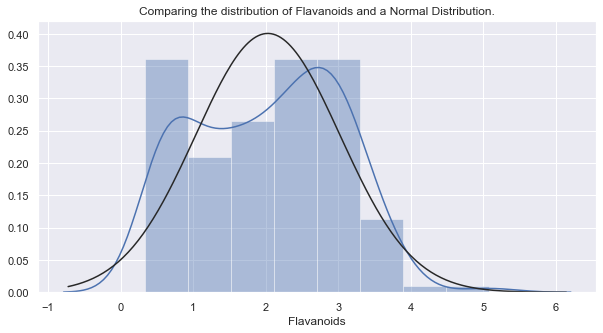

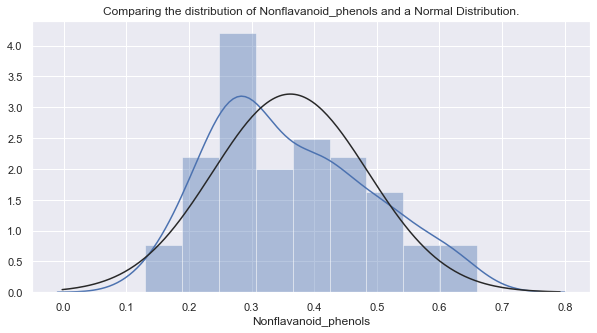

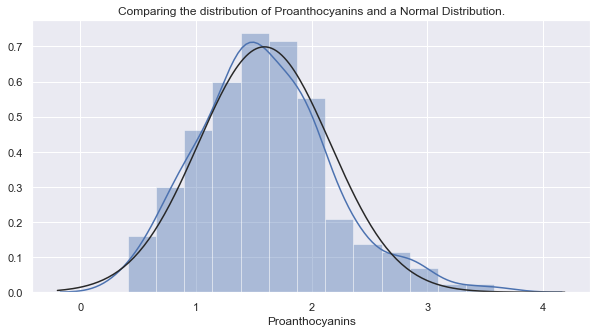

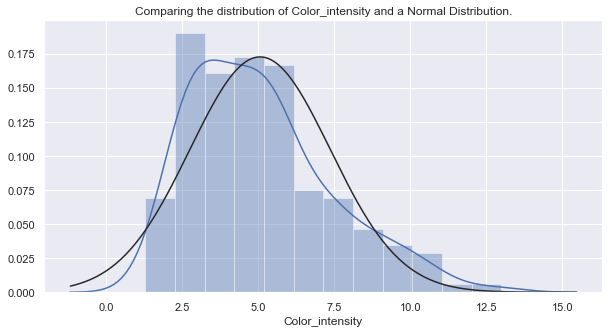

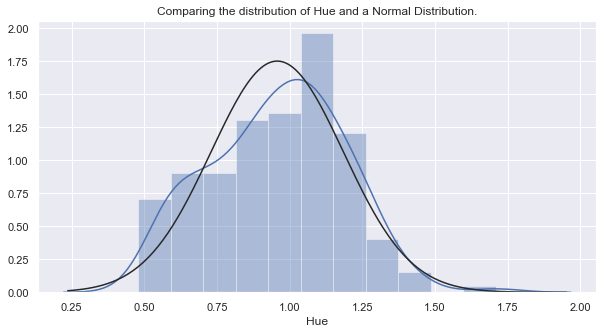

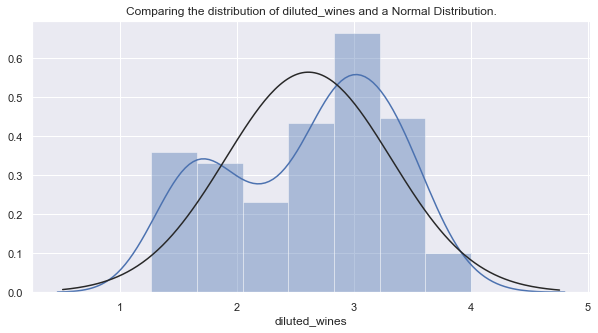

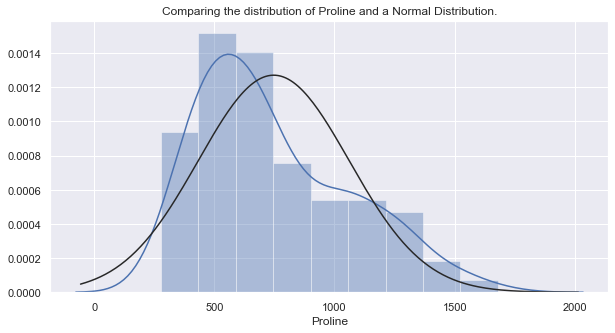

In [88]:
for col in df.drop(['Class'], axis=1).columns:
    dist_plot(df,col)

Observations:

1. All the variables are very close to a Normal distribution. 

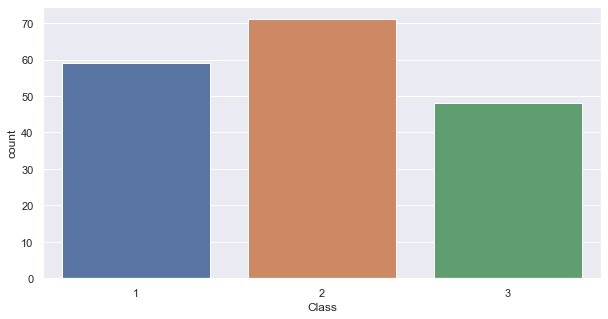

In [116]:
sns.countplot(df['Class'])

### Analysing with respect to the target variable

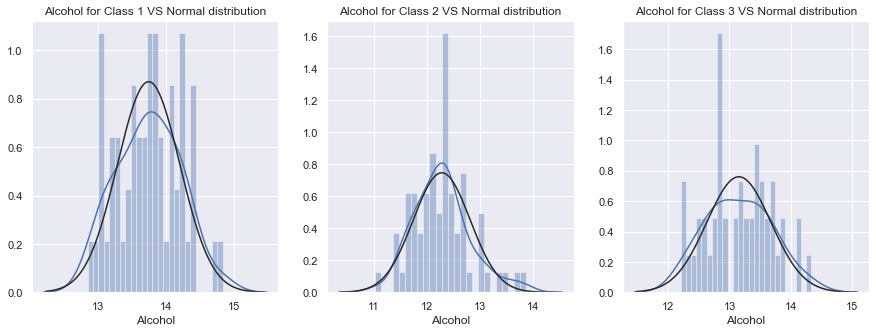

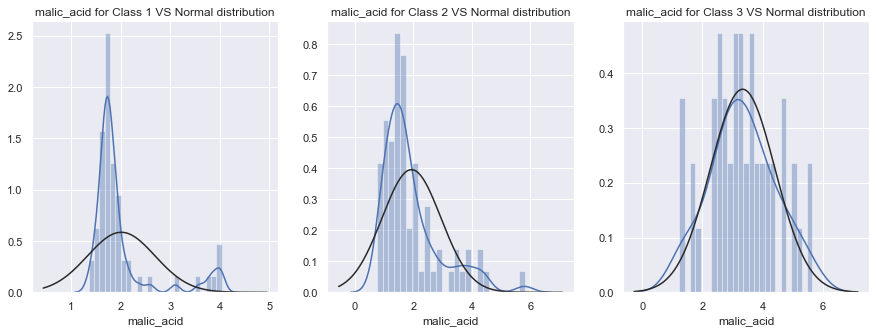

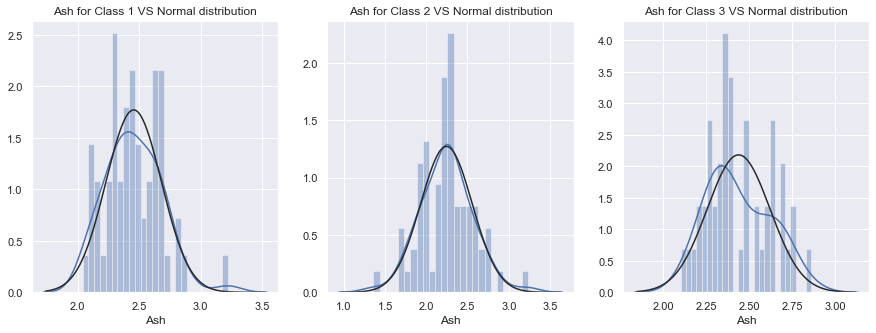

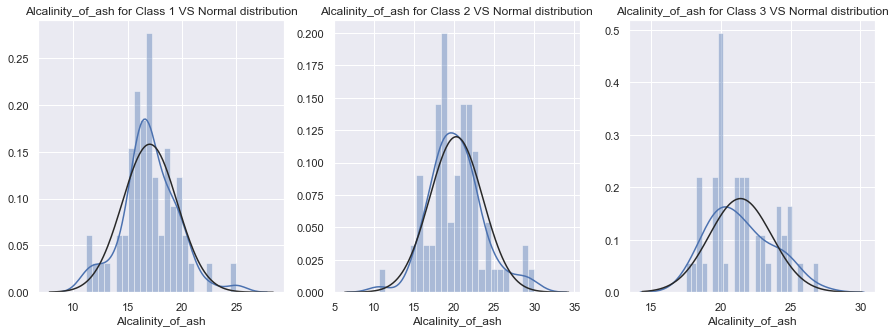

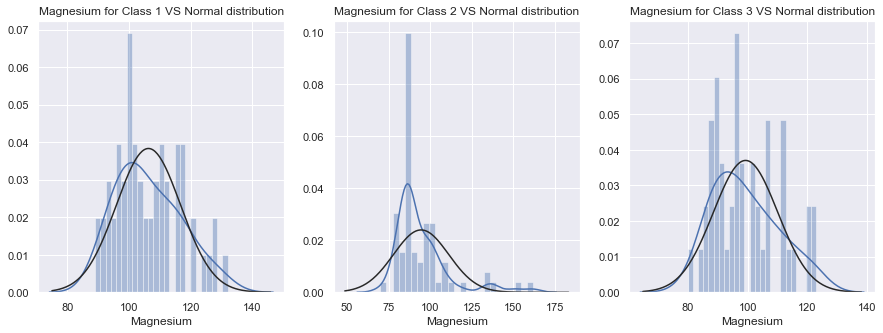

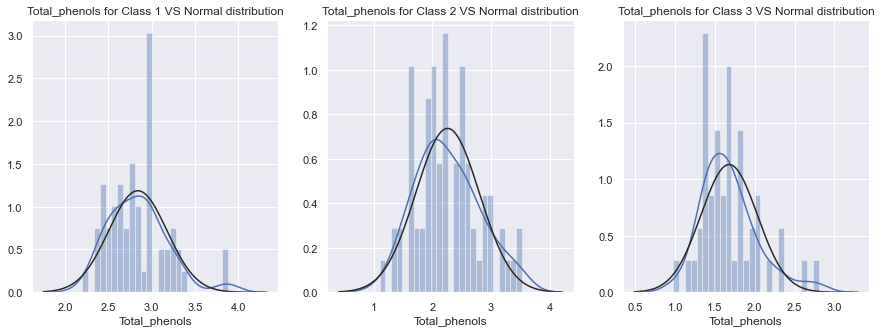

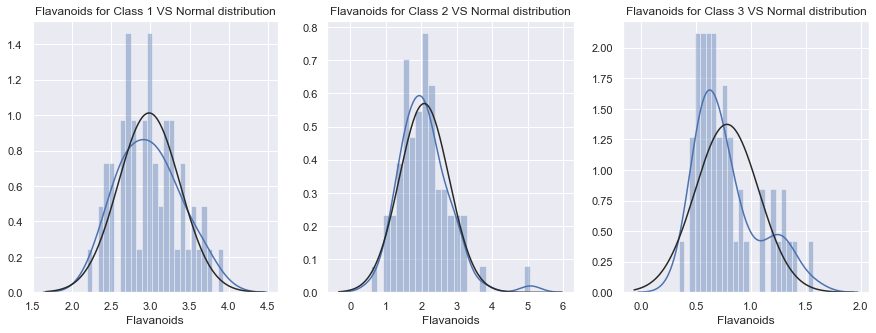

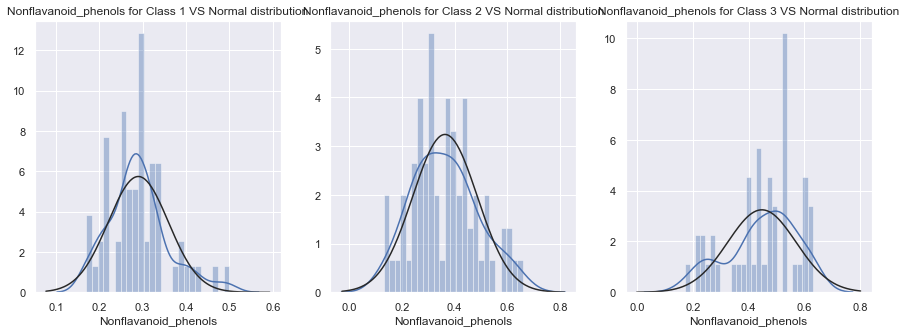

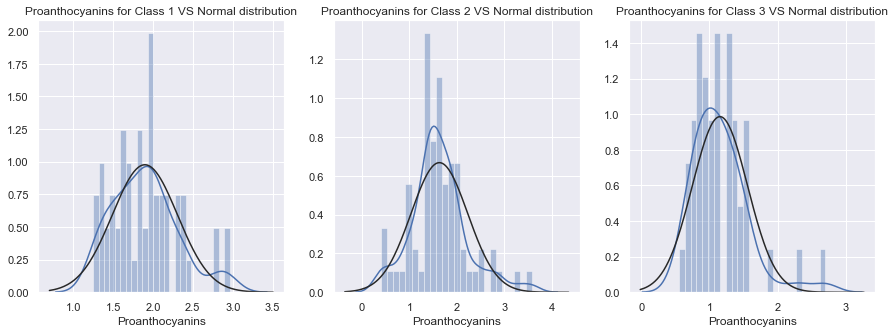

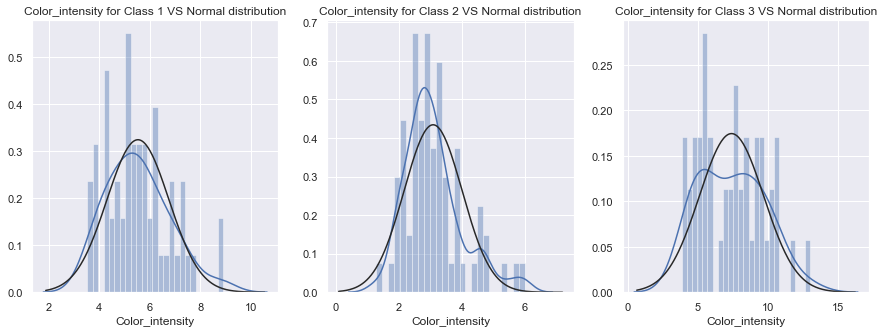

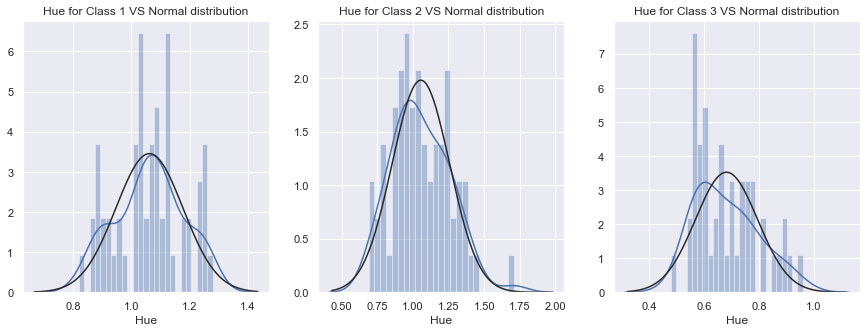

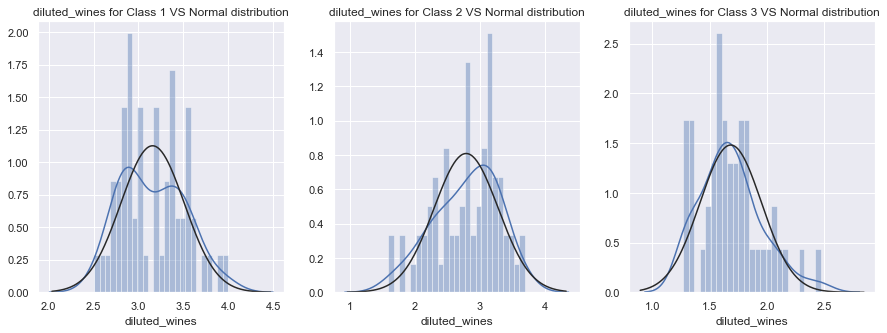

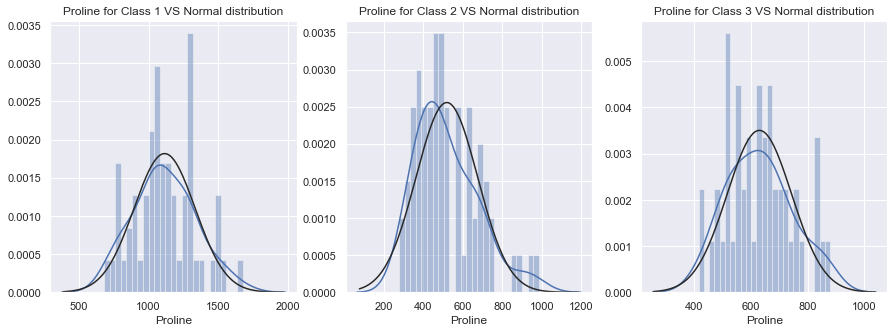

In [89]:
sns.set(rc={"figure.figsize": (15, 5)})

for col in df.drop(['Class'], axis=1).columns:    
    fig, ax = plt.subplots(1,3)
    for i in df['Class'].unique():
        sns.distplot(df[df['Class']==i][col], bins=25, ax = ax[i-1], fit=norm)
        ax[i-1].set_title(f'{col} for Class {i} VS Normal distribution')
    
        
        

Observations:

From the above graphs we can see that all three classes for each variable is pretty close to a normal distribution.

### Bivariate analysis

Now lets figure out if the independent variables are able to significantly differentiate between the Different classes in the target variable 'Class'

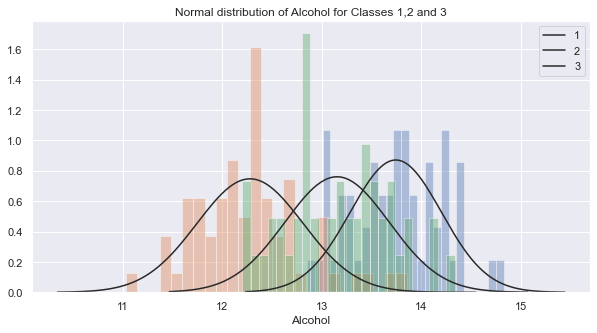

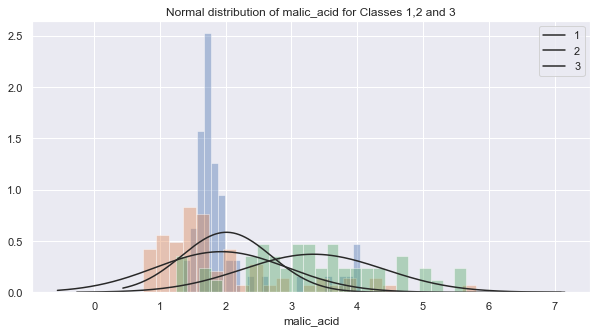

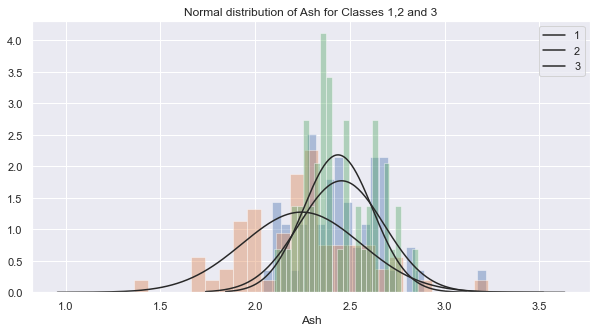

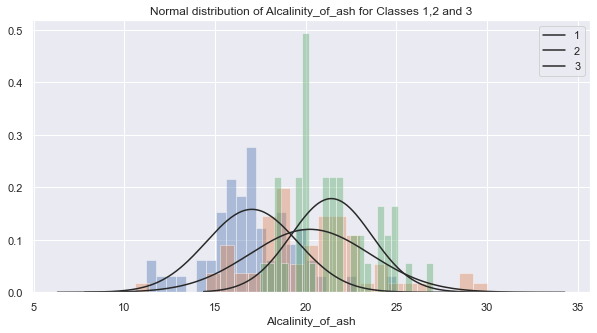

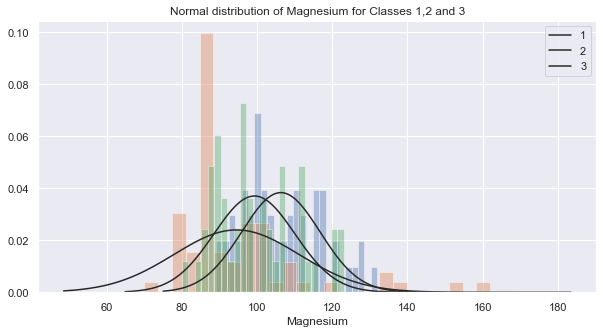

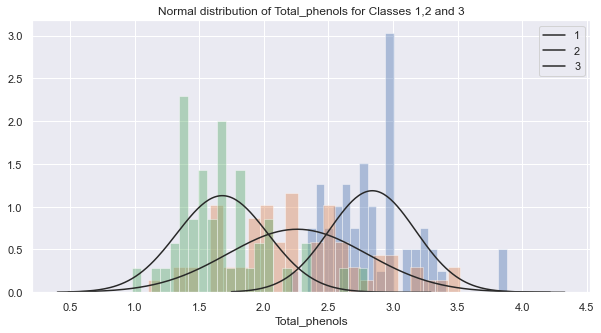

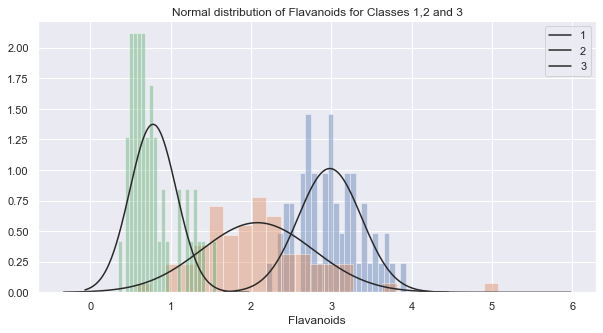

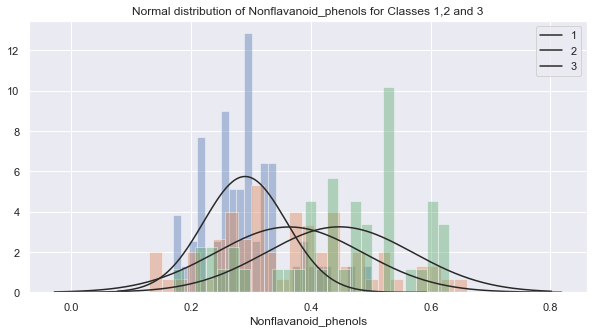

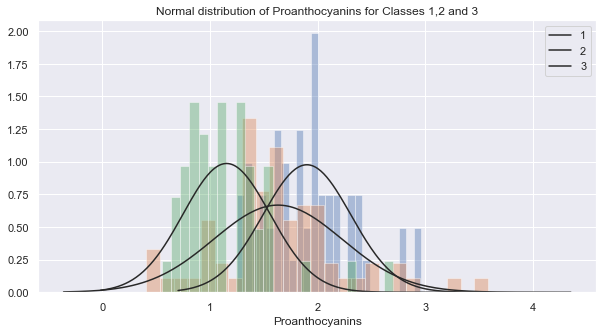

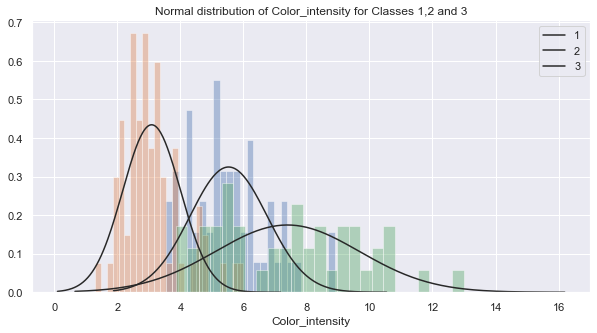

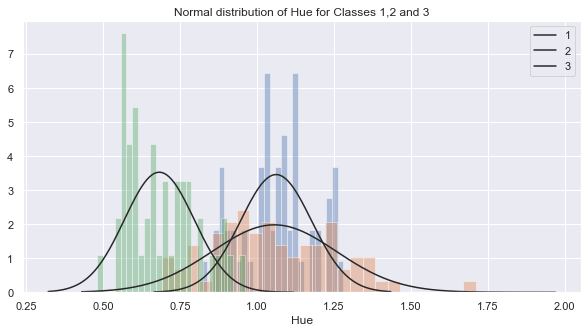

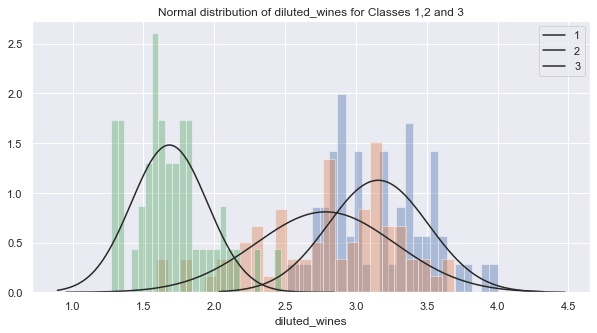

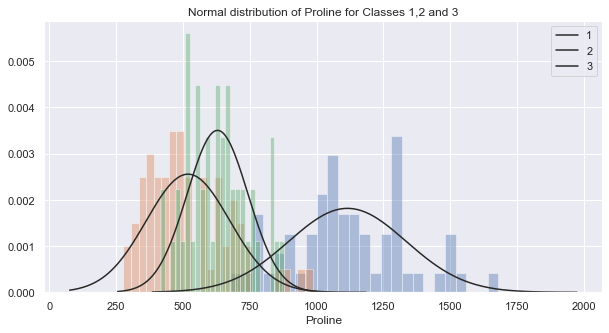

In [90]:
sns.set(rc={"figure.figsize": (10, 5)})

for col in df.drop(['Class'], axis=1).columns:    
    for i in df['Class'].unique():
        plt.title(f'Normal distribution of {col} for Classes 1,2 and 3')
        sns.distplot(df[df['Class']==i][col], bins=25,fit=norm,kde=False)
    plt.legend([1,2,3])
    plt.show()

Observations:

From the above plots, we can say that the classes are clearly differentiated in each variable. This is a good sign because this indicates our features are able to show difference between the different classes in the target variable


### ANOVA

The variables are useful in a model only if they can clearly distinguish between the different Classes in the target variable. We can test that by doing an ANOVA test.

Lets do an ANOVA test to confirm that all the classes are significantly different from each other.

In [91]:
for col in df.drop(['Class'], axis=1).columns:    
    f,p = f_oneway(df[df['Class']==1][col],df[df['Class']==2][col],df[df['Class']==3][col])
    if p <= 0.05:
        print(f'The Distribution of Classes 1, 2 and 3 in "{col}" variable are significantly different.')
    else:
        print(f'The Distribution of Classes 1, 2 and 3 in "{col}" variable are NOT significantly different.')


The Distribution of Classes 1, 2 and 3 in "Alcohol" variable are significantly different.
The Distribution of Classes 1, 2 and 3 in "malic_acid" variable are significantly different.
The Distribution of Classes 1, 2 and 3 in "Ash" variable are significantly different.
The Distribution of Classes 1, 2 and 3 in "Alcalinity_of_ash" variable are significantly different.
The Distribution of Classes 1, 2 and 3 in "Magnesium" variable are significantly different.
The Distribution of Classes 1, 2 and 3 in "Total_phenols" variable are significantly different.
The Distribution of Classes 1, 2 and 3 in "Flavanoids" variable are significantly different.
The Distribution of Classes 1, 2 and 3 in "Nonflavanoid_phenols" variable are significantly different.
The Distribution of Classes 1, 2 and 3 in "Proanthocyanins" variable are significantly different.
The Distribution of Classes 1, 2 and 3 in "Color_intensity" variable are significantly different.
The Distribution of Classes 1, 2 and 3 in "Hue" var

Observation:

The result from the ANOVA test shows that all the variables are able to clearly distinguish between the different classes in our Target variable 'Class'

#### Boxplots

In [92]:
df.columns

Index(['Class', 'Alcohol', 'malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'diluted_wines',
       'Proline'],
      dtype='object')

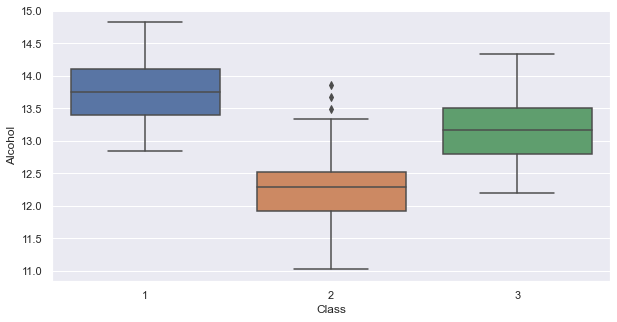

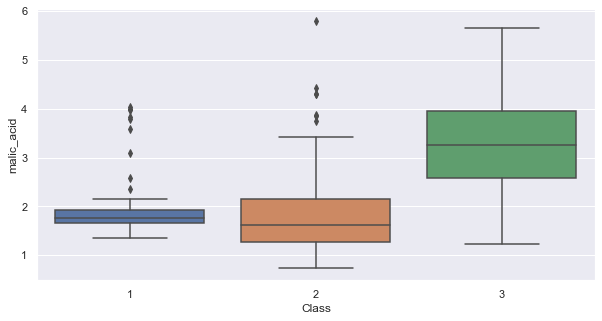

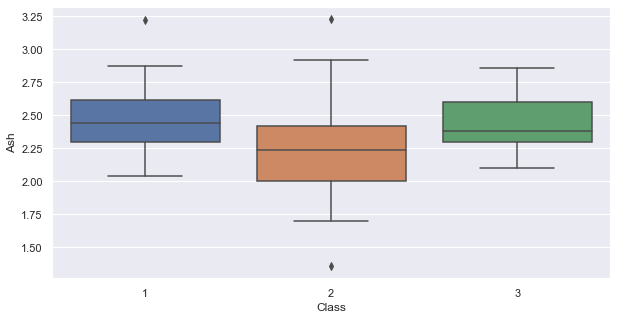

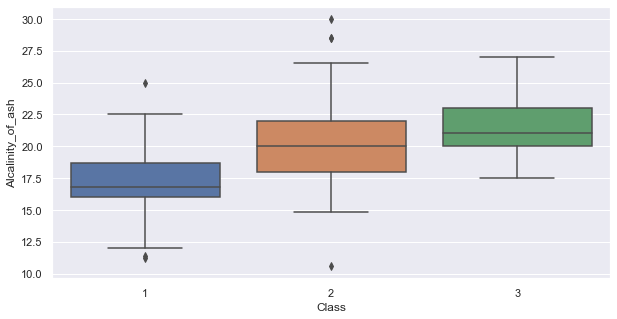

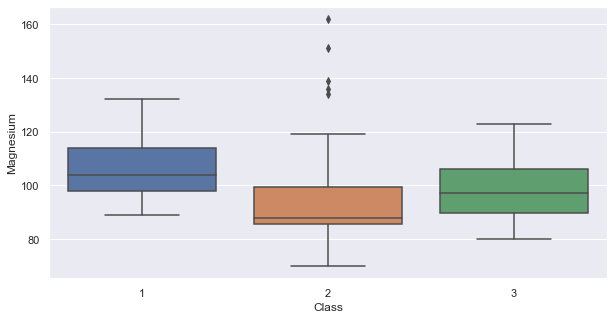

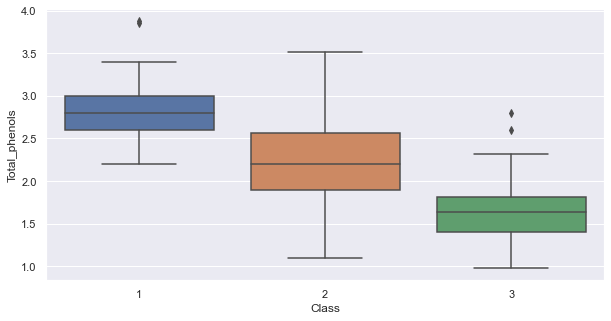

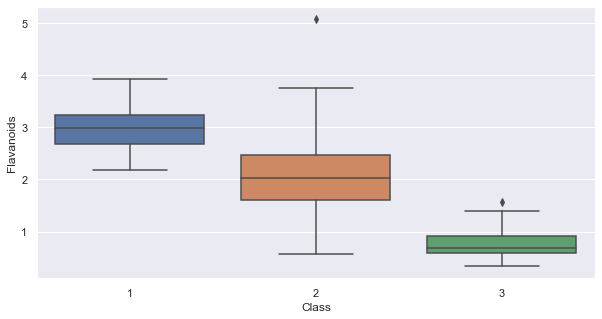

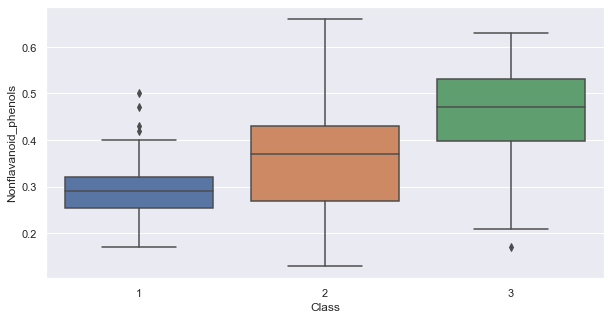

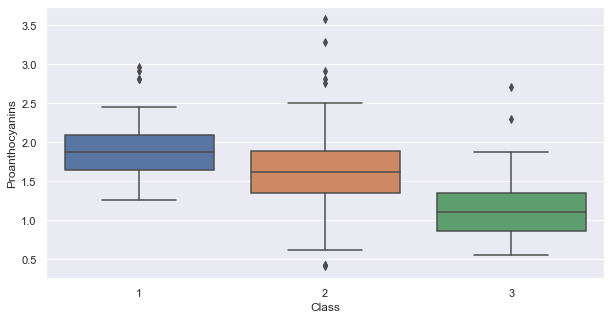

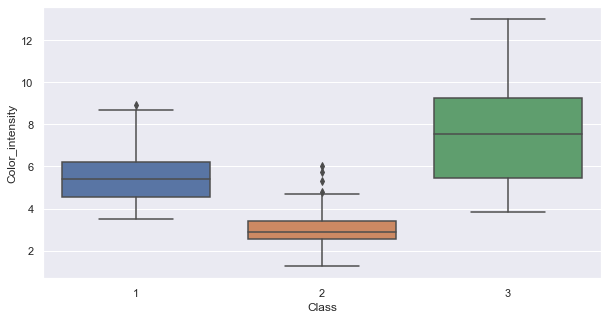

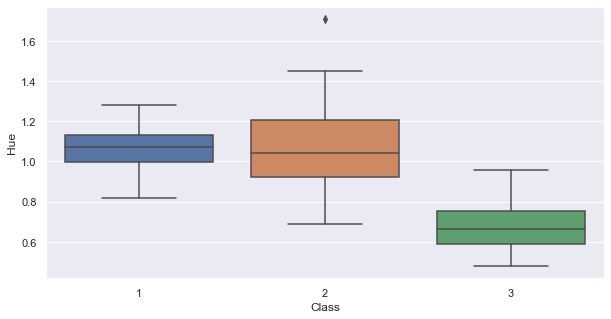

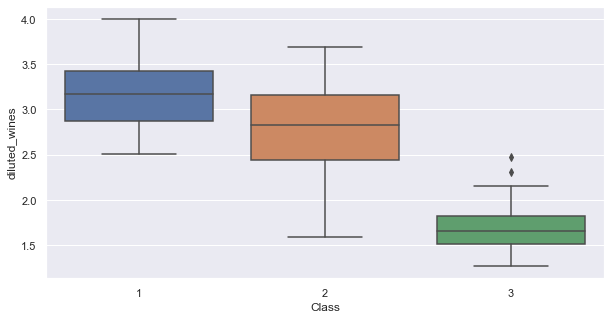

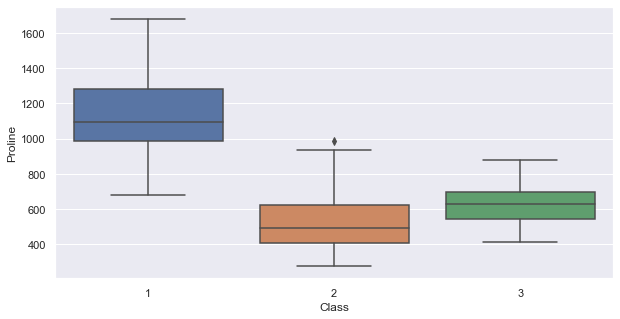

In [112]:
for col in df.drop(['Class'],axis=1).columns:
    sns.boxplot(x = 'Class', y = col, data=df)
    plt.show()

sns.boxplot(x = 'Class', y = 'Alcohol', data=df)

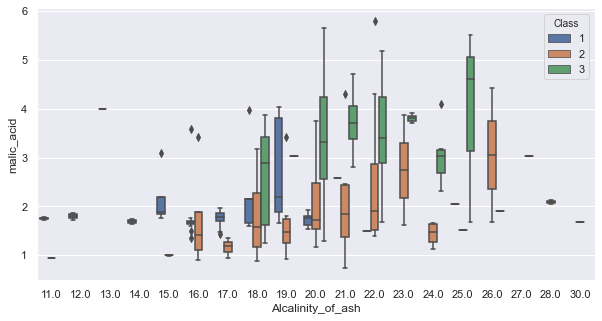

In [117]:
plt.figure(figsize=(10,5))
sns.boxplot(x = round(df['Alcalinity_of_ash']), y = 'malic_acid', hue = 'Class',data=df)


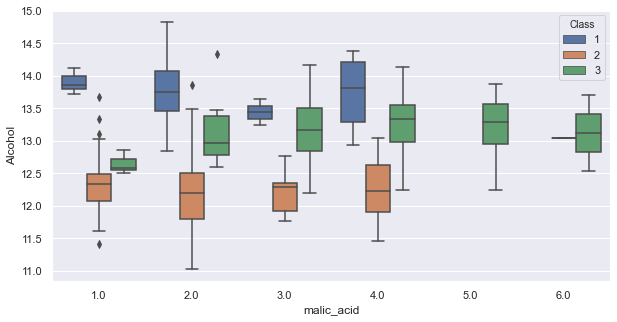

In [123]:

plt.figure(figsize=(10,5))
sns.boxplot(x = round(df['malic_acid']), y = 'Alcohol', hue = 'Class',data=df)


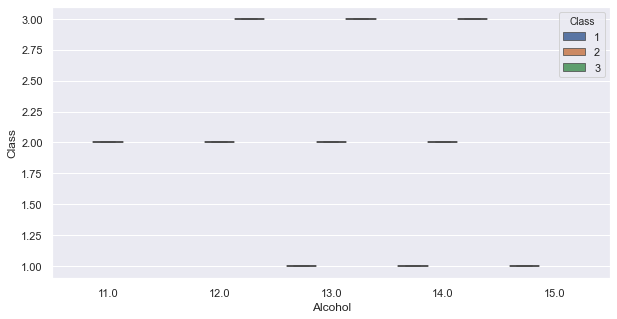

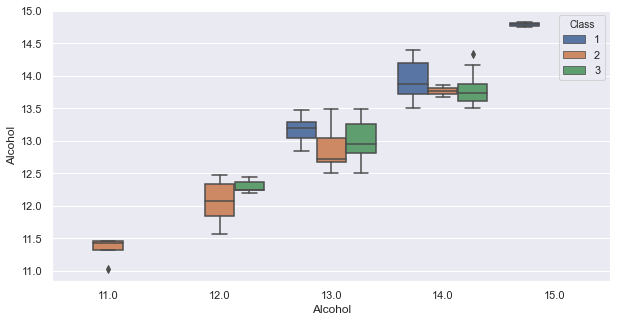

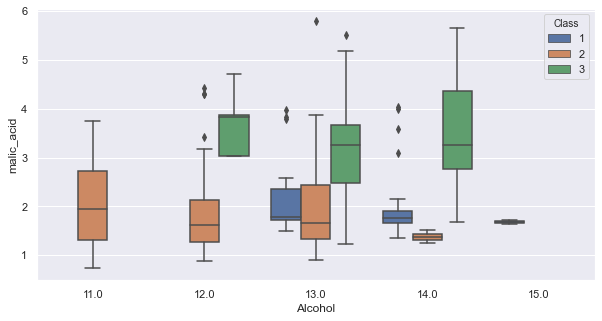

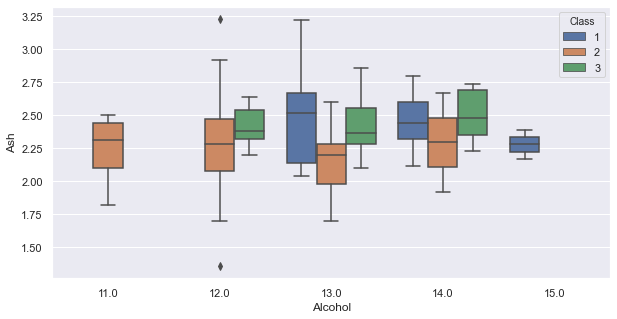

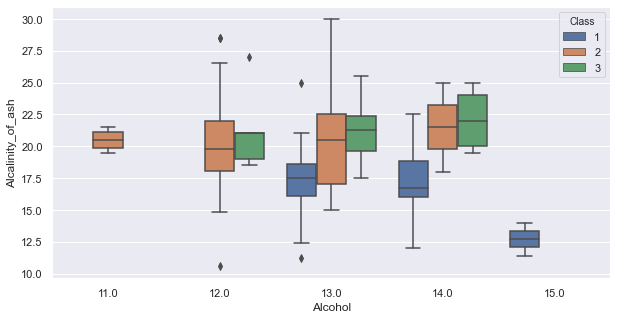

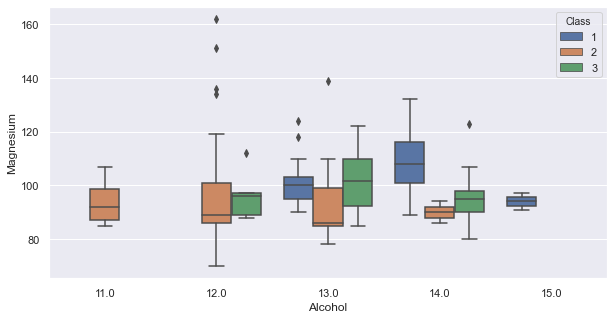

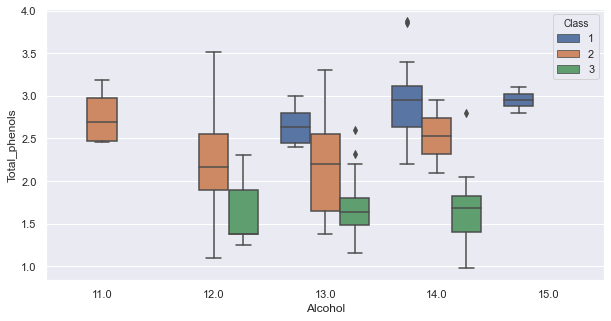

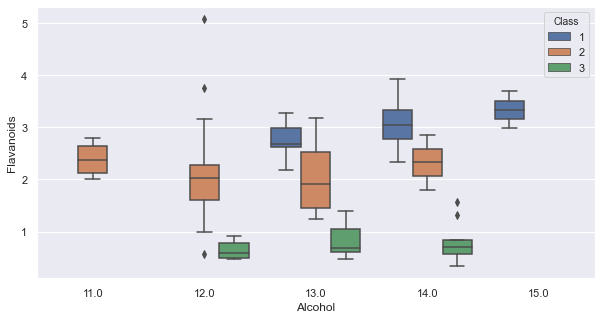

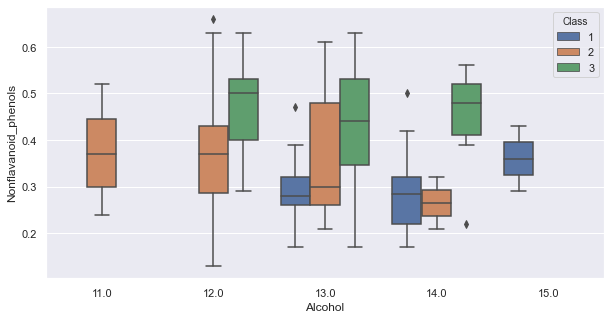

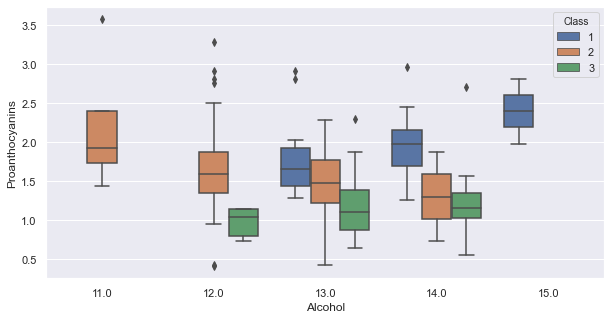

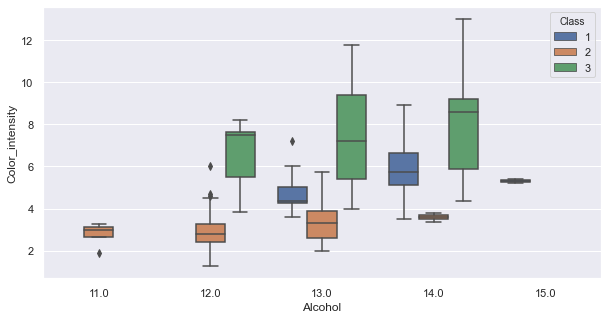

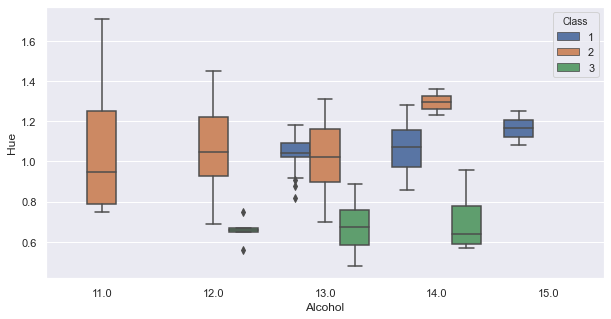

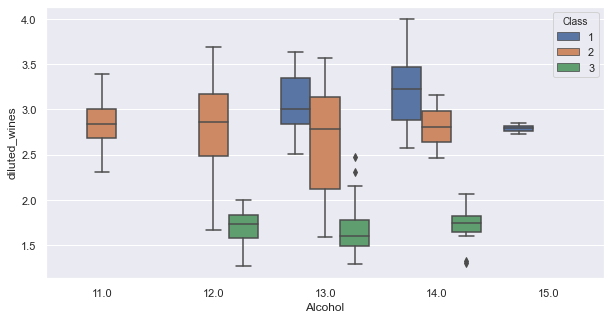

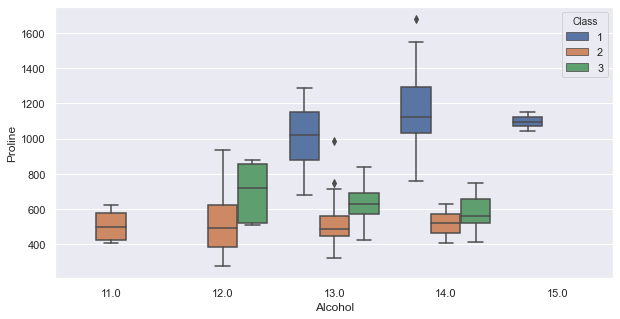

In [127]:
for i in df.columns:
        plt.figure(figsize=(10,5))
        sns.boxplot(x = round(df['Alcohol']), y = i, hue = 'Class',data=df)
        plt.show()

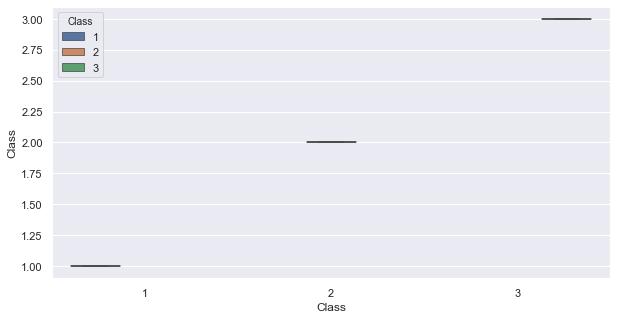

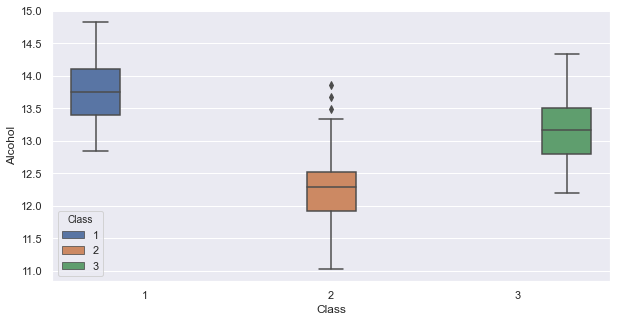

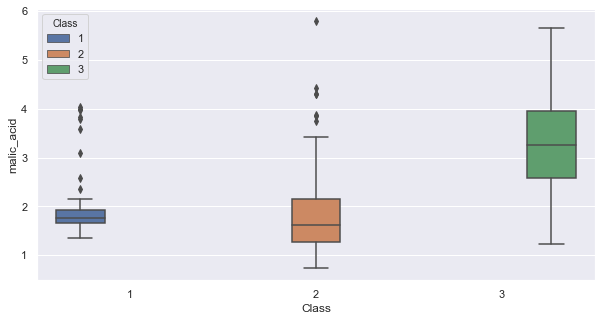

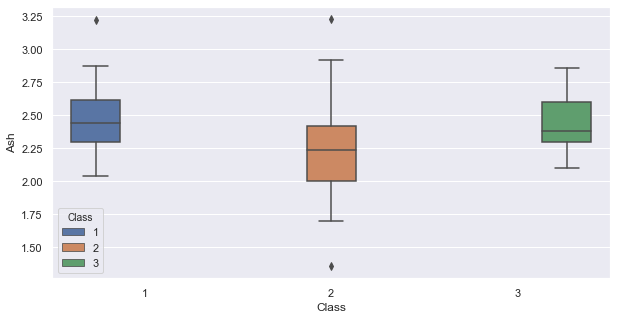

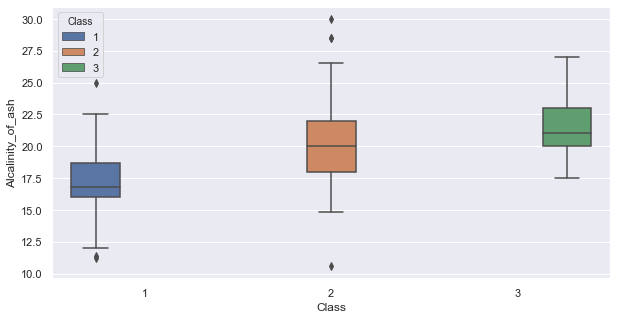

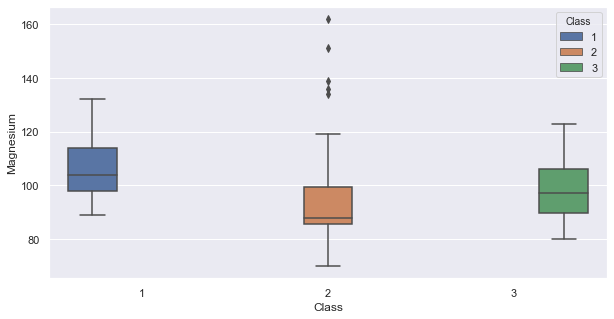

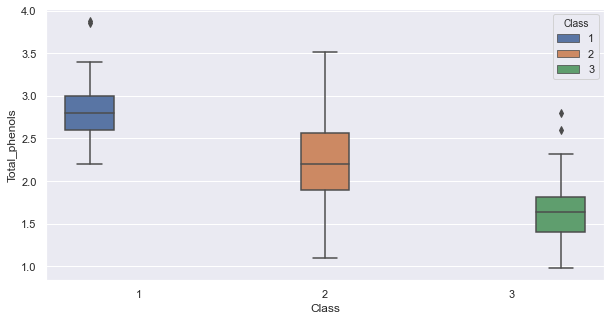

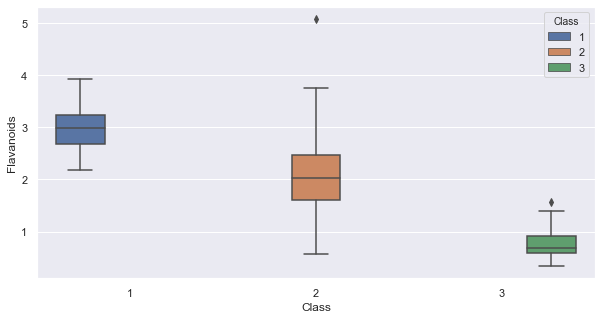

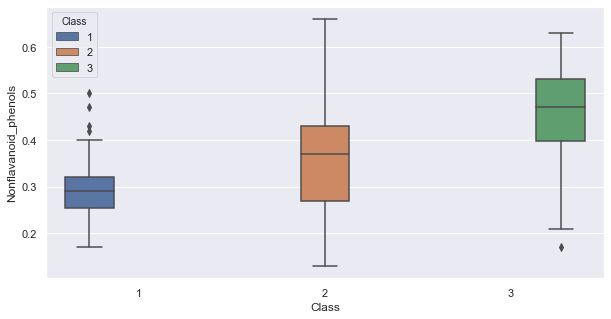

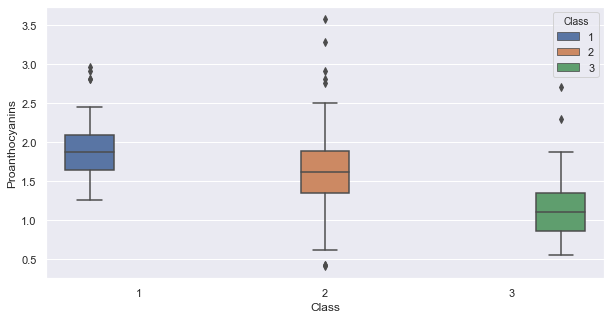

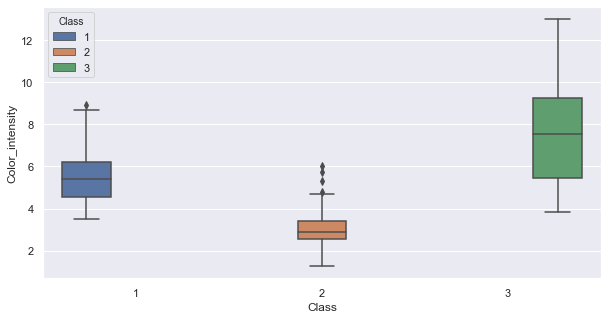

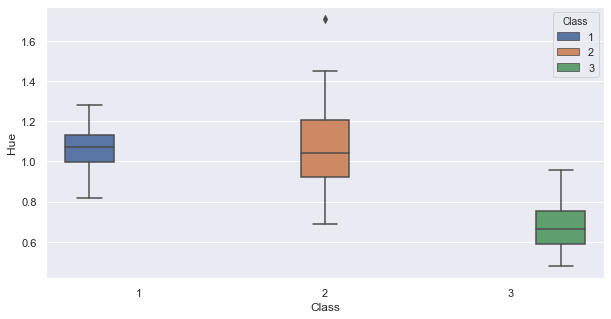

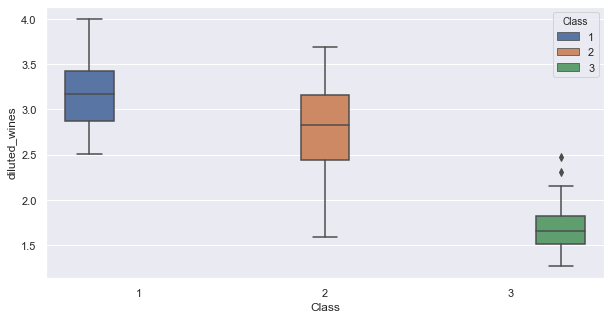

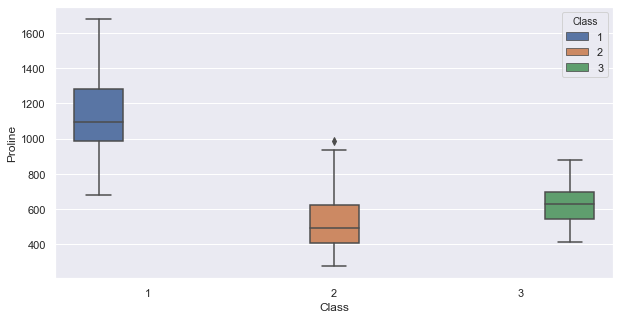

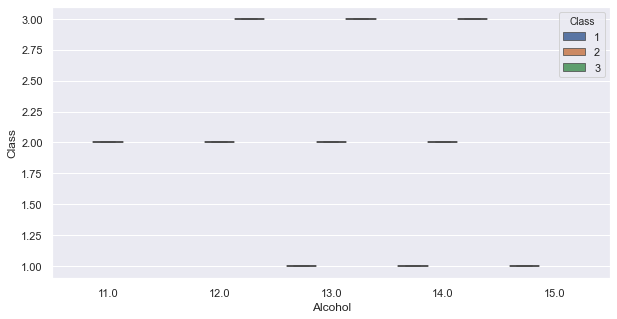

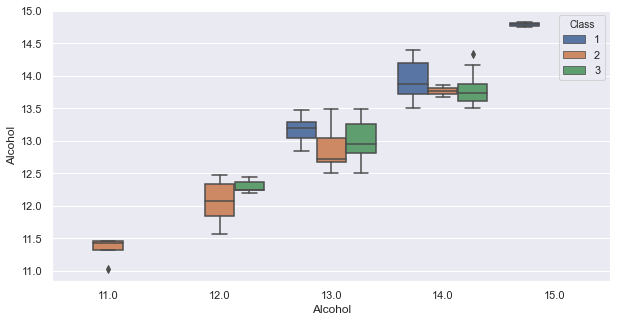

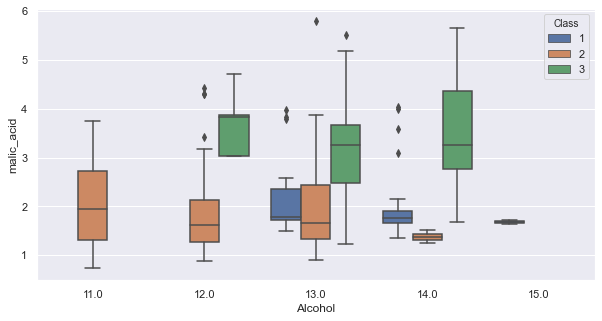

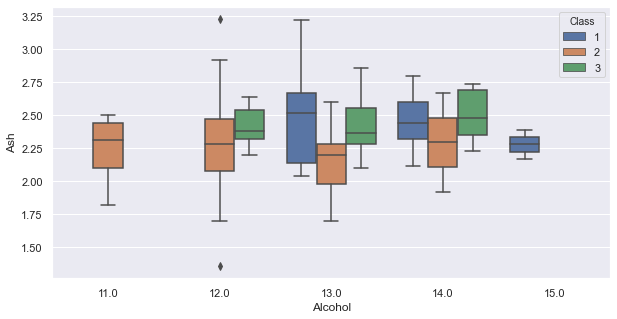

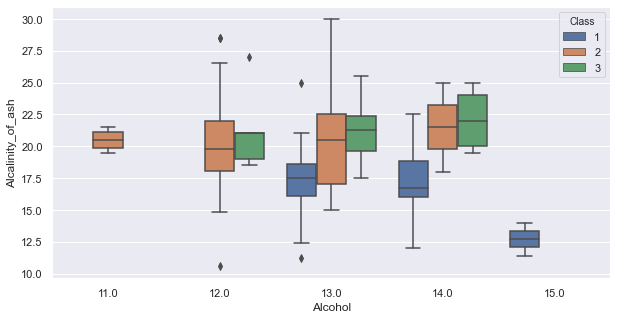

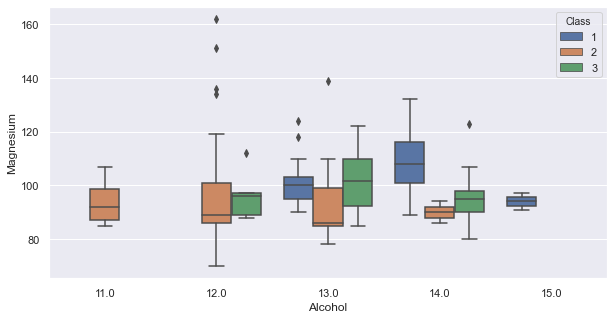

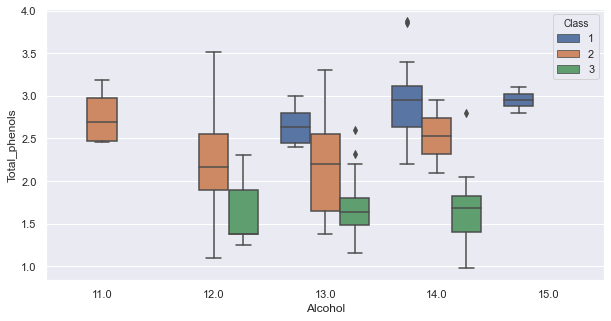

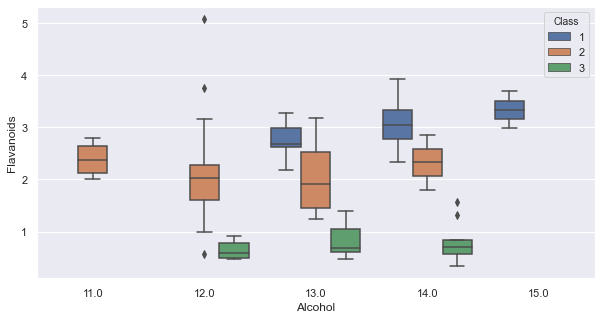

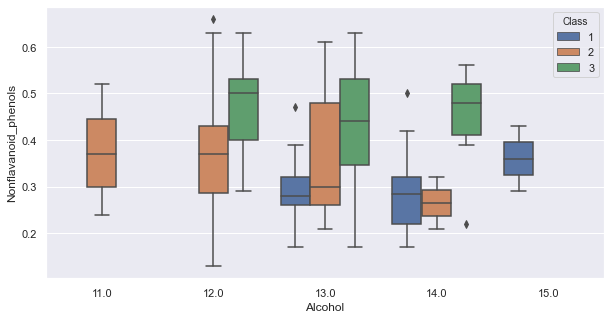

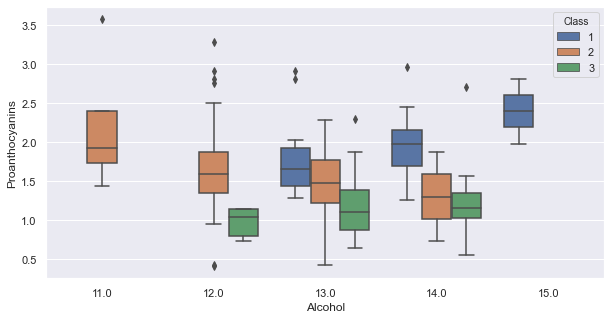

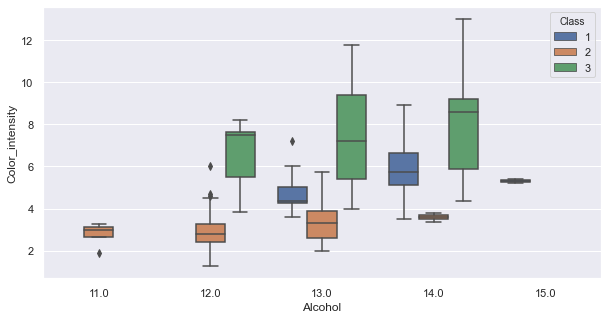

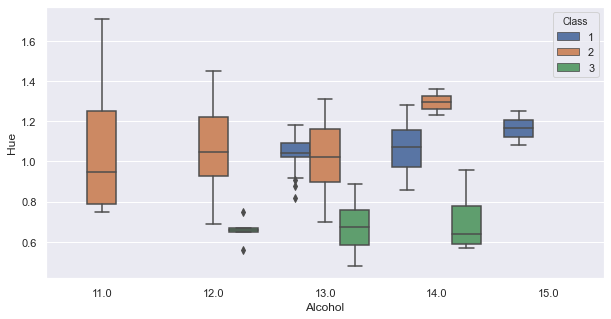

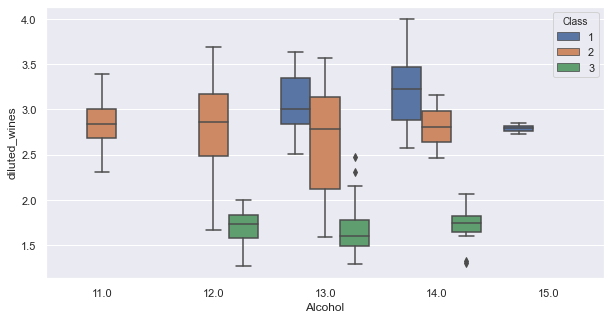

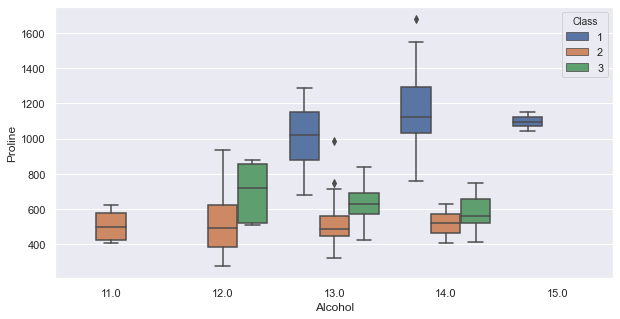

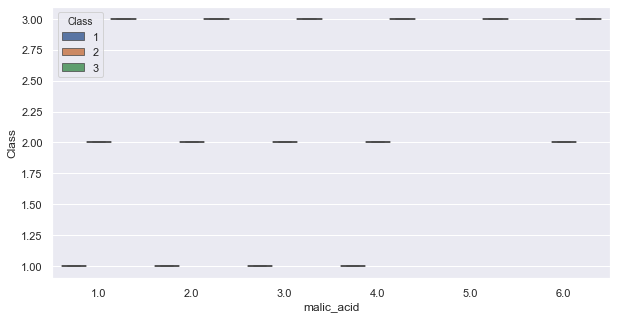

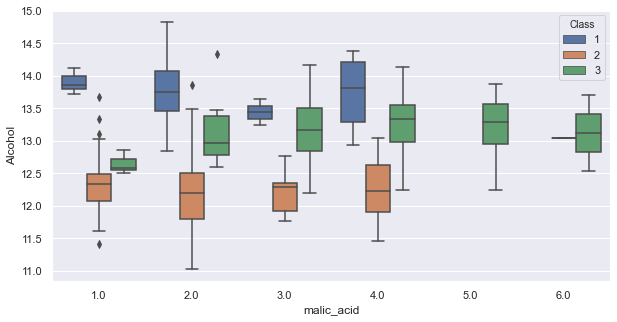

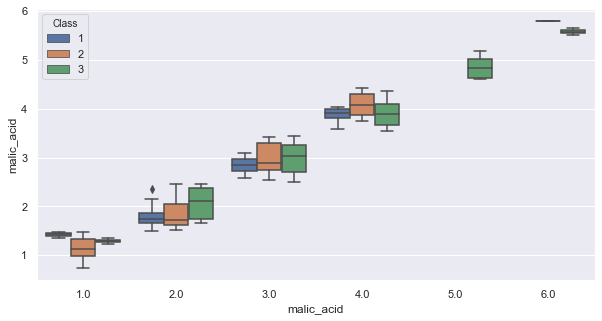

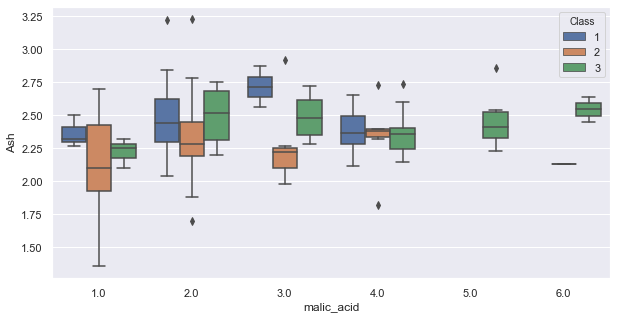

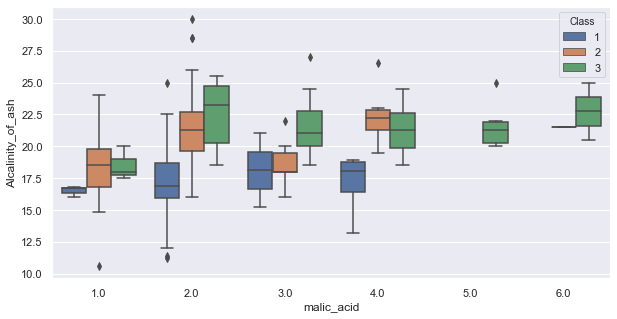

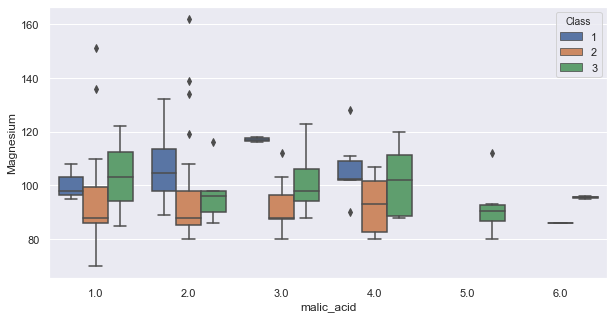

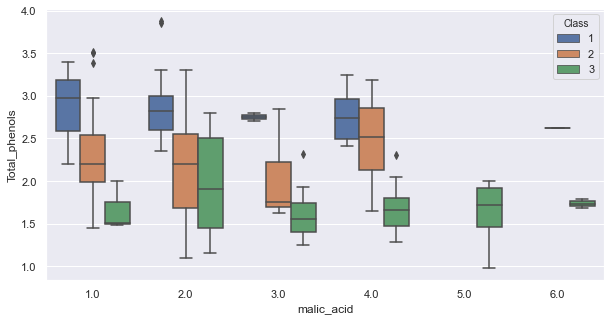

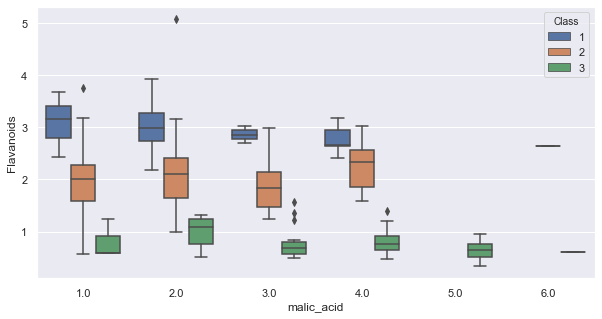

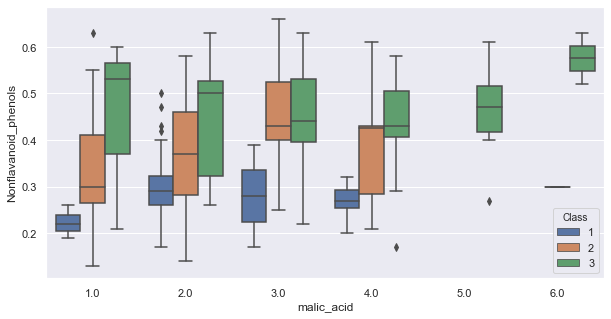

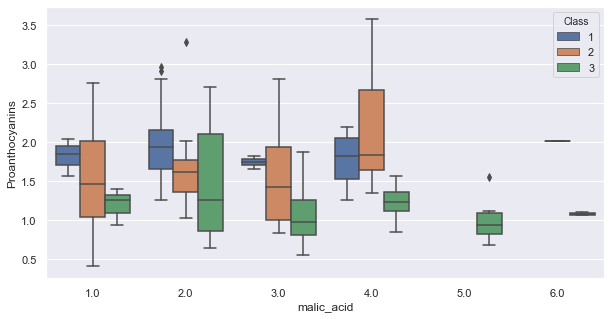

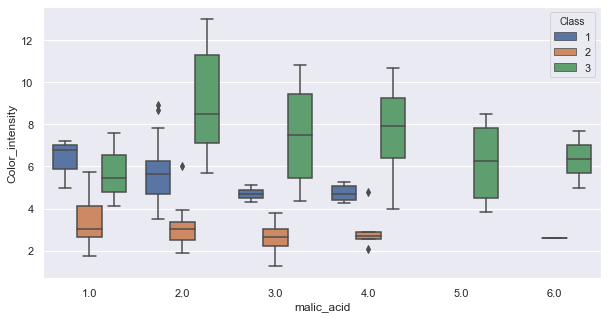

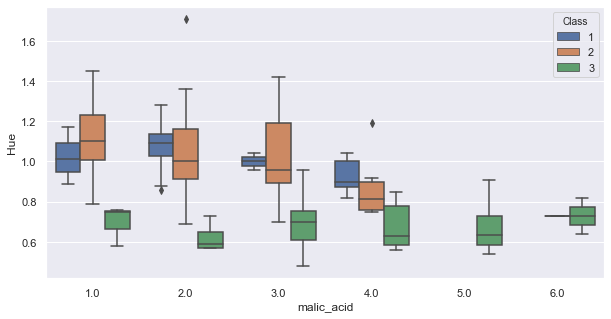

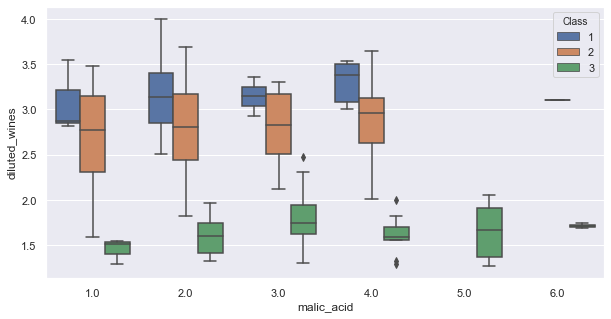

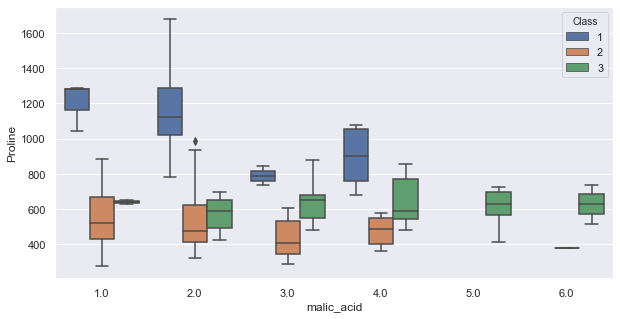

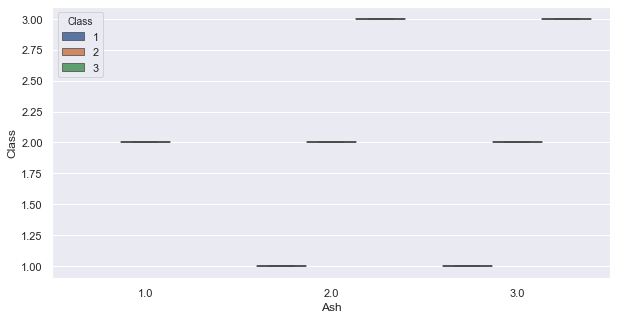

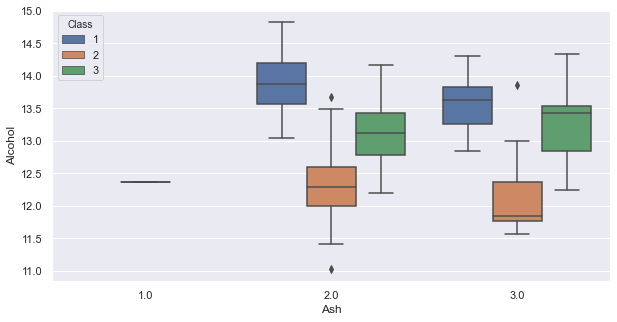

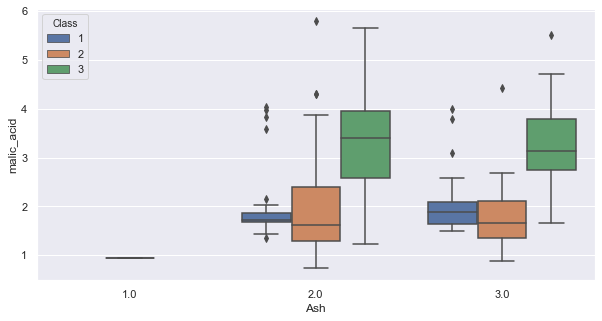

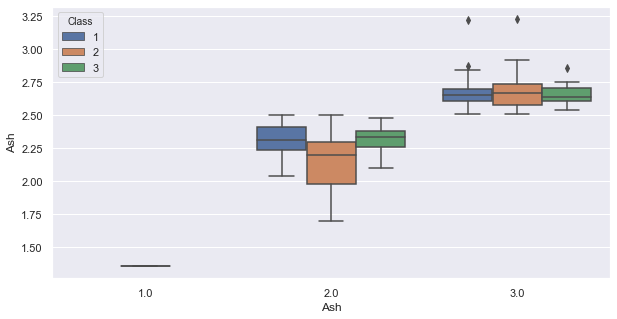

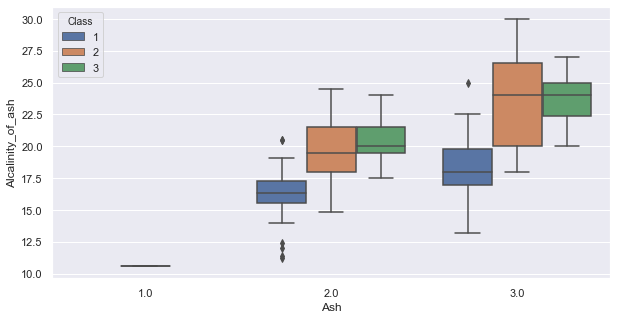

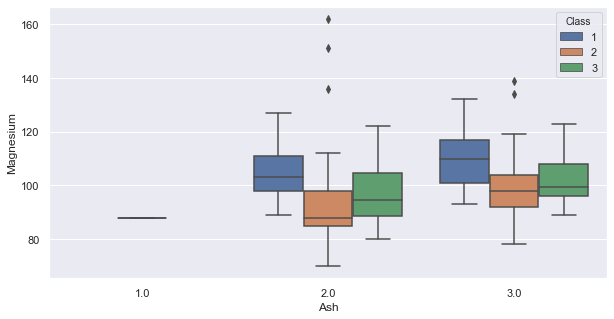

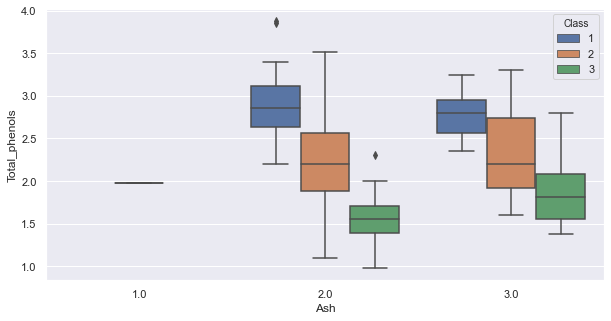

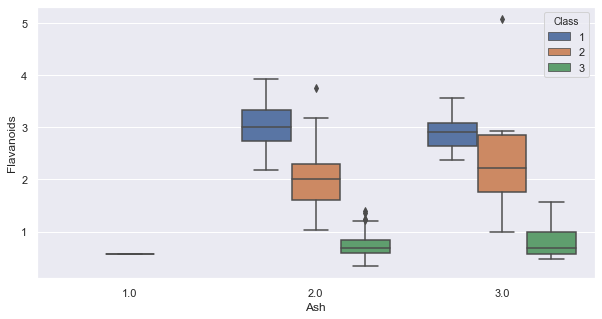

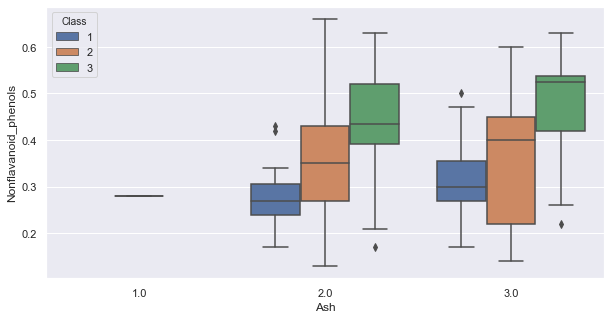

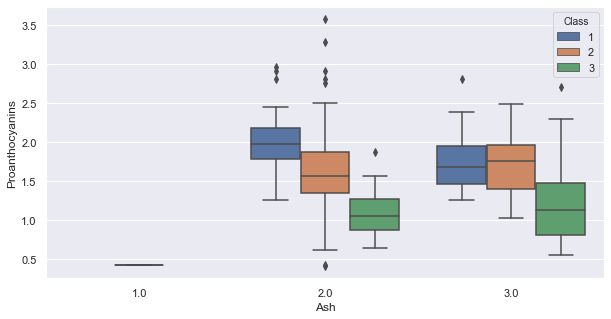

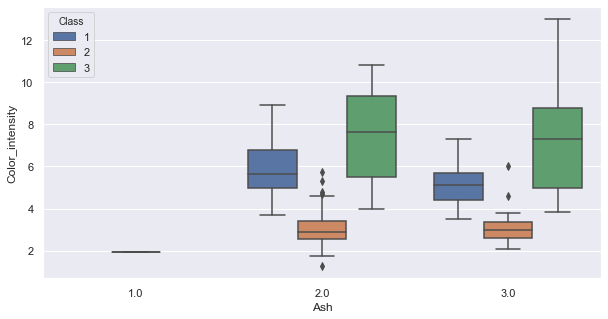

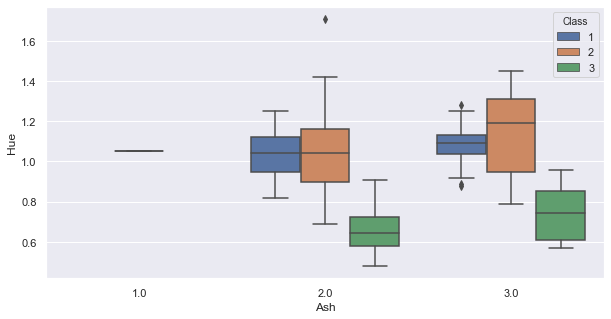

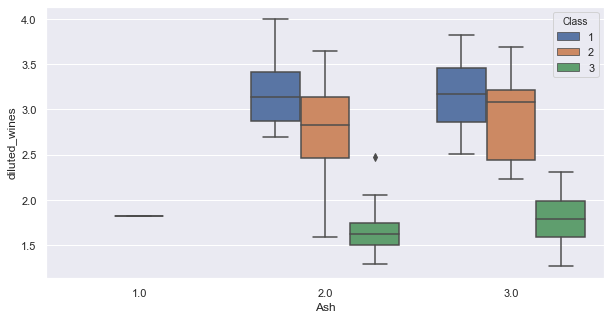

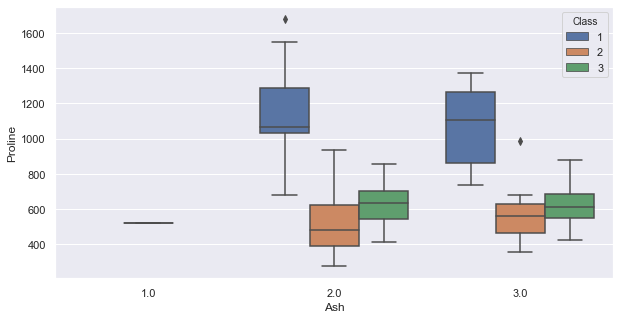

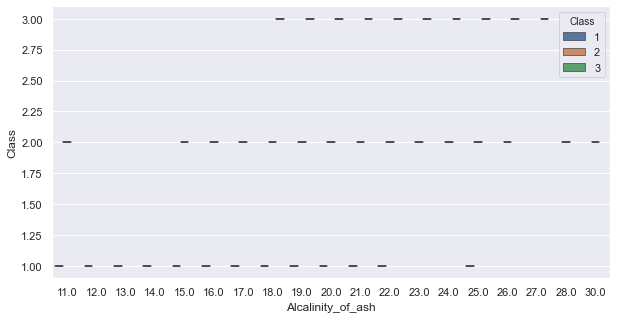

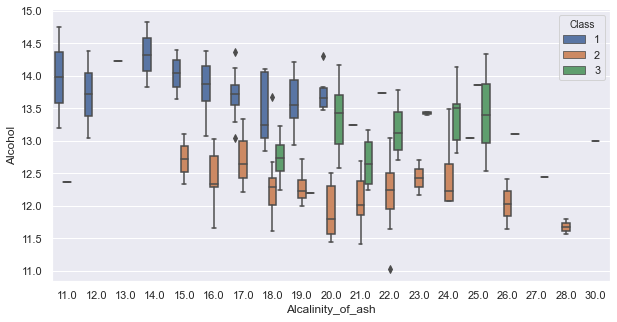

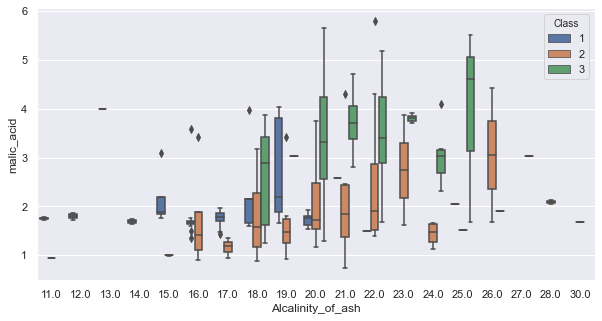

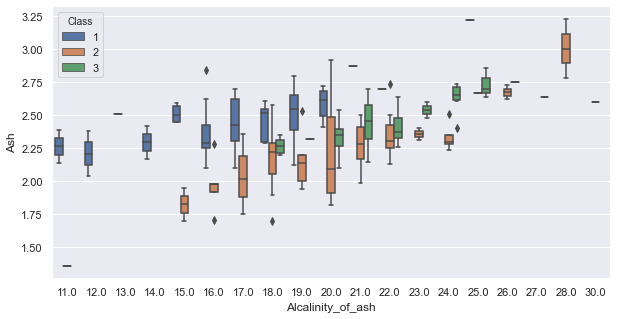

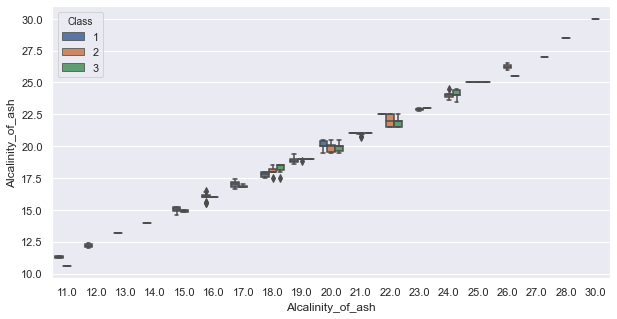

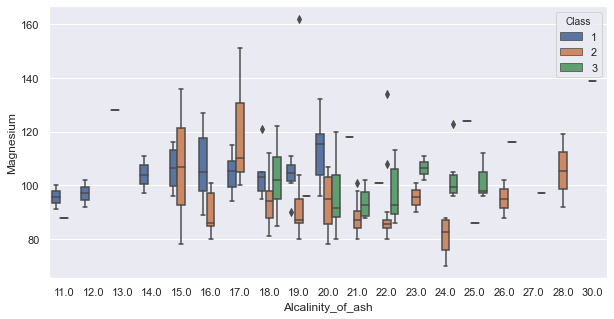

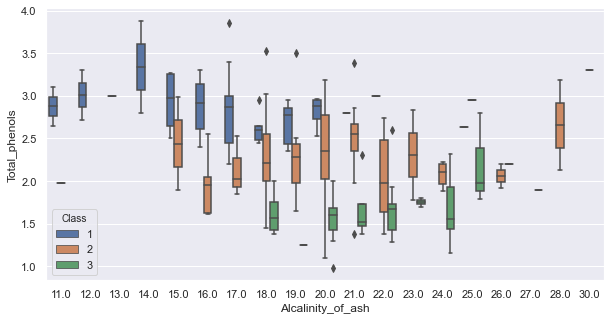

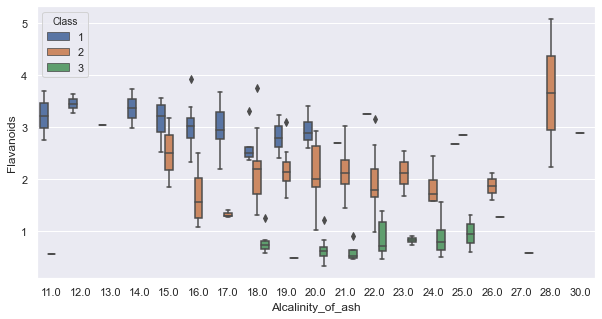

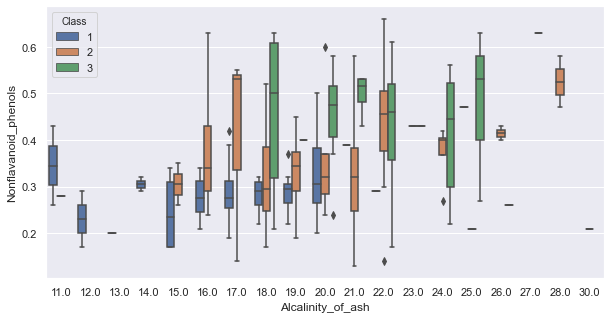

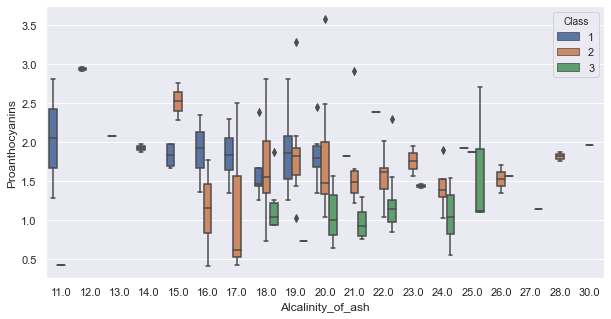

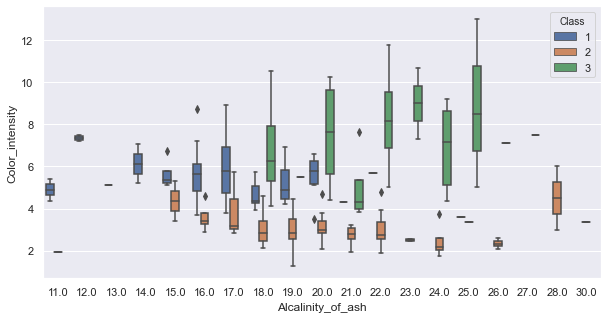

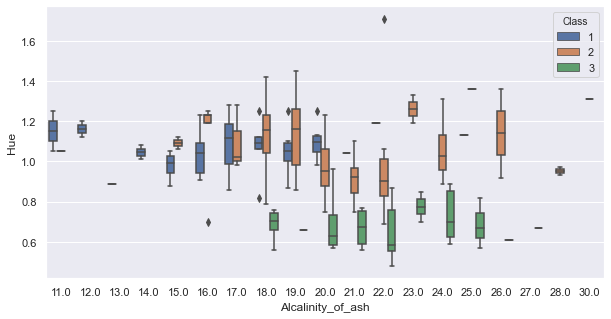

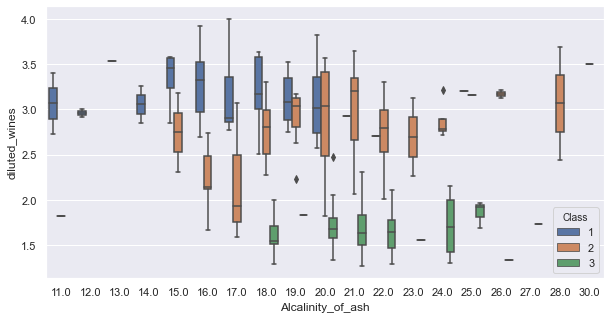

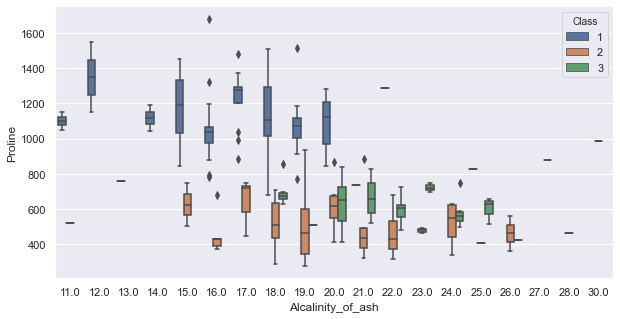

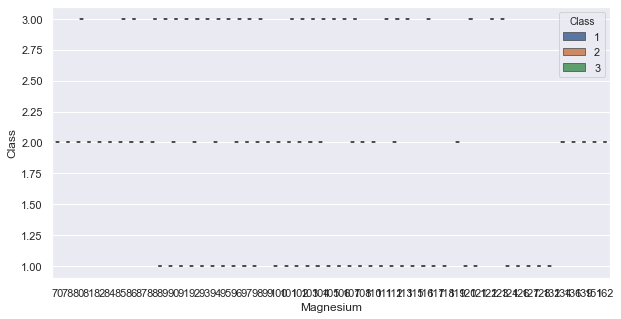

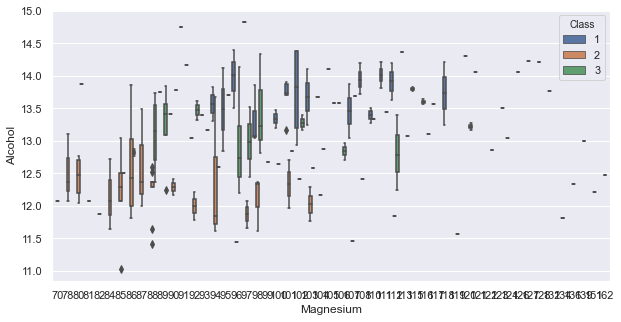

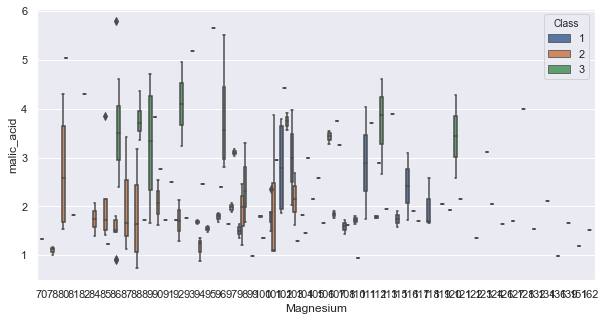

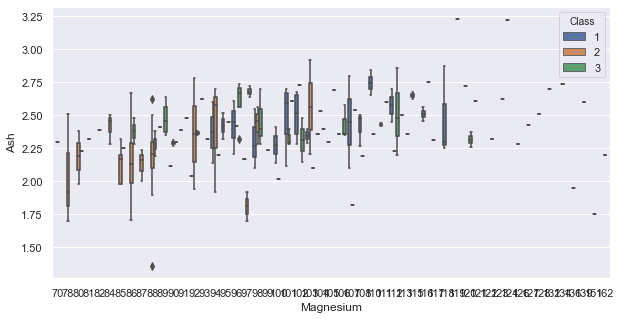

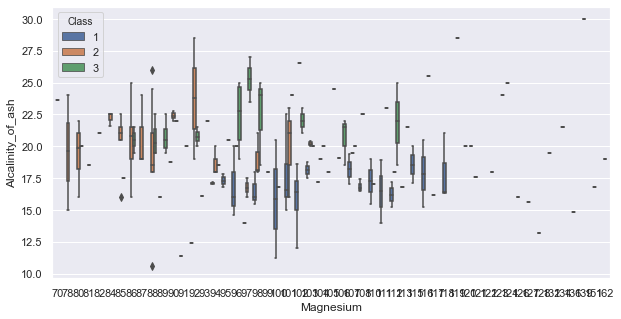

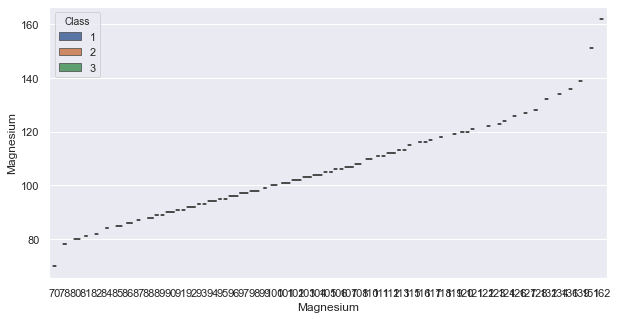

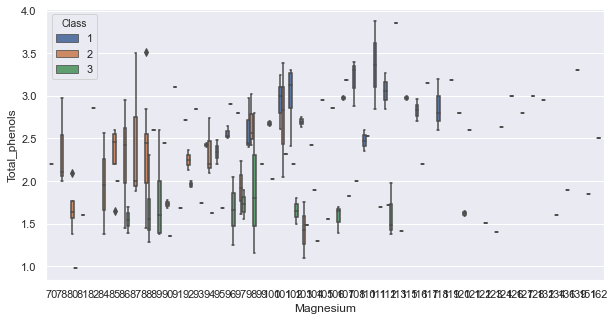

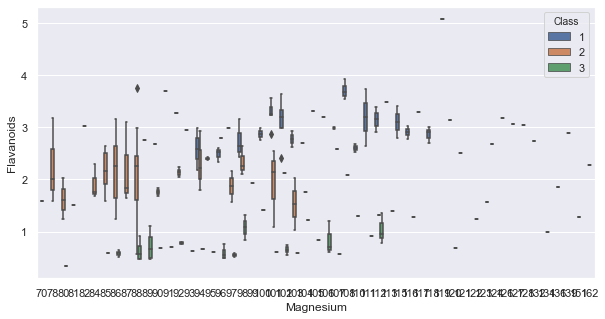

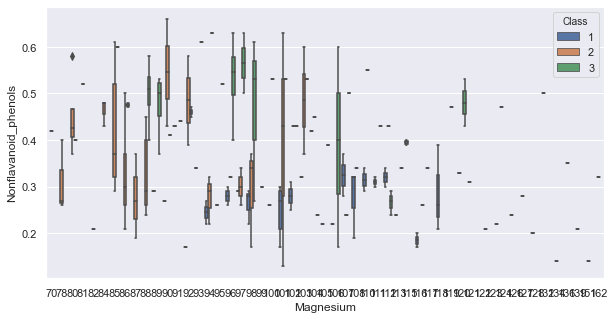

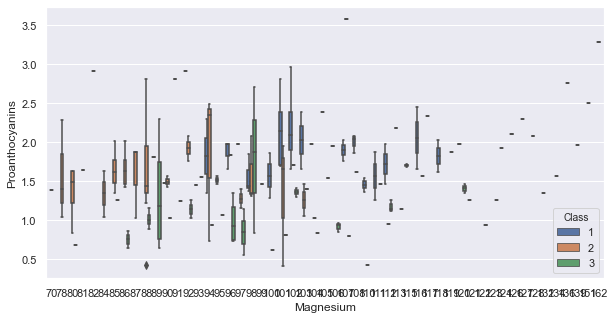

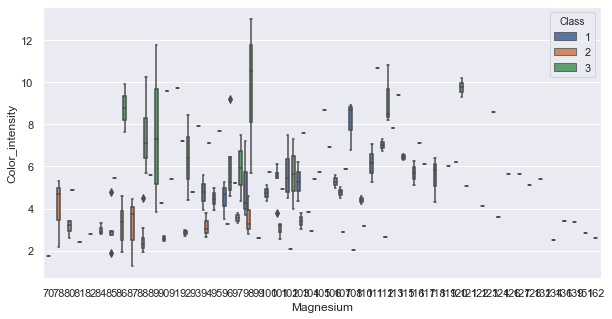

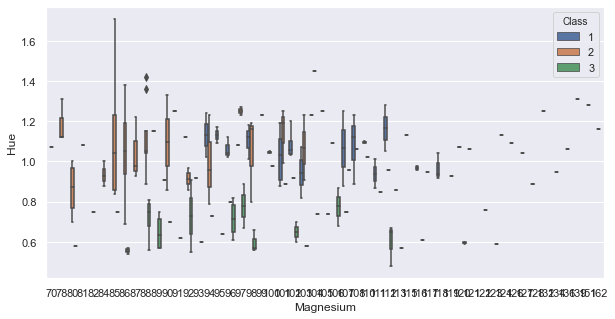

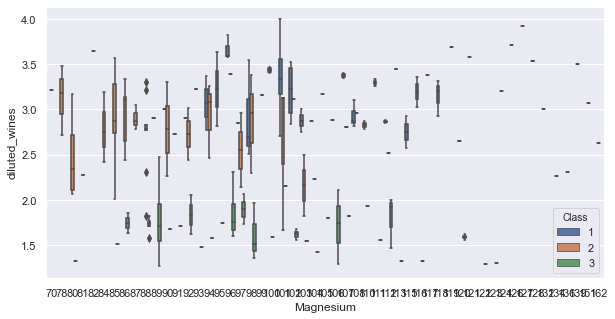

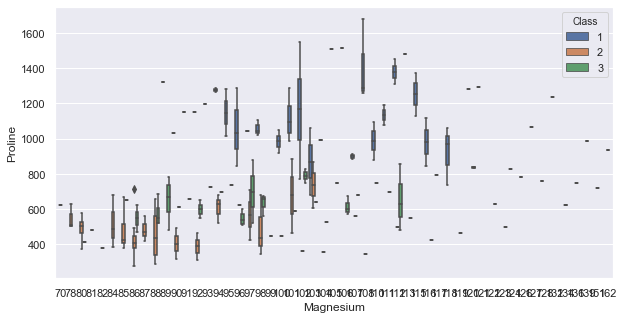

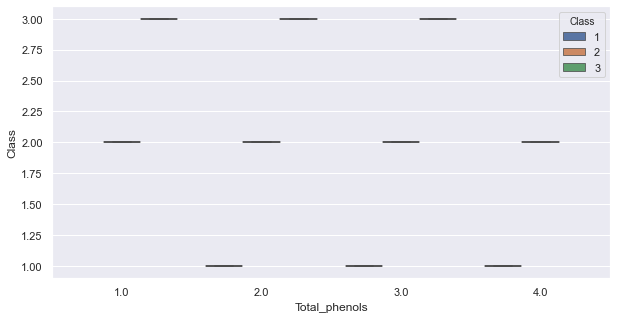

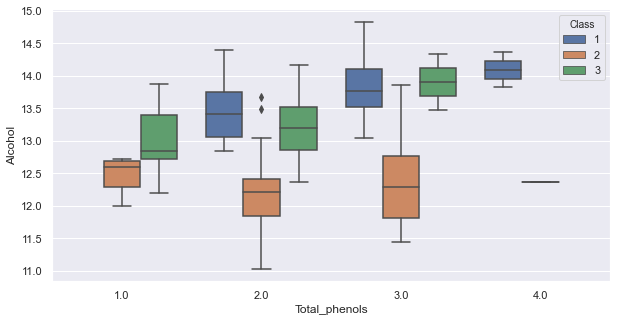

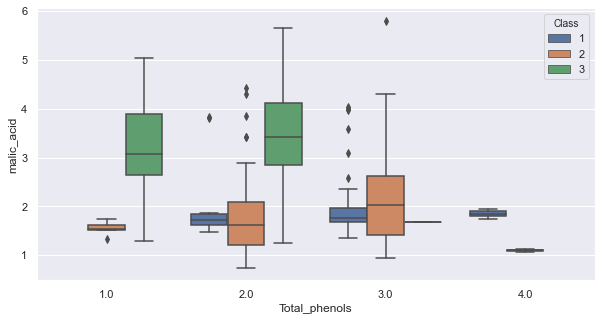

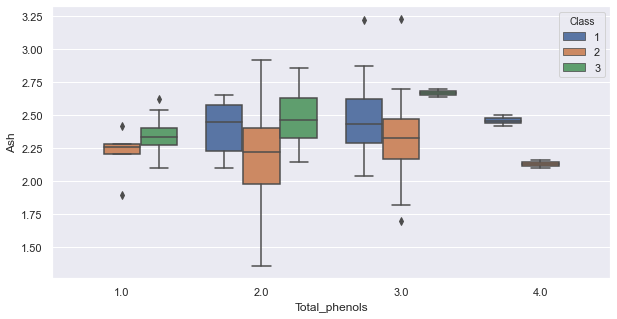

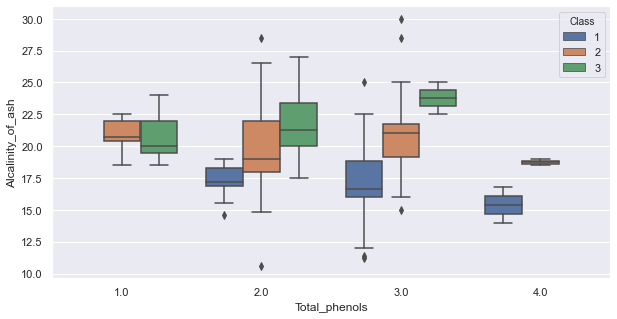

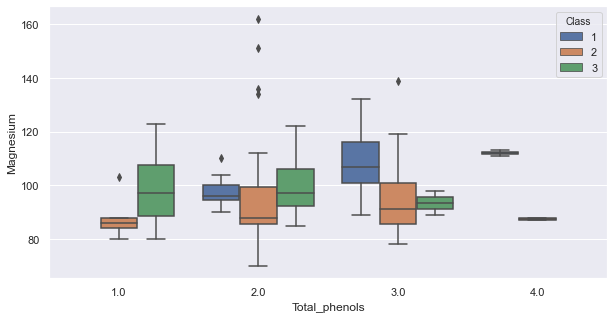

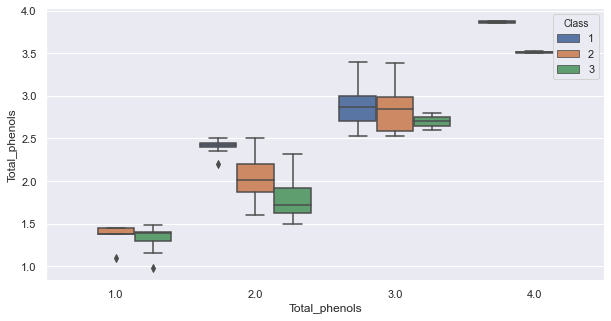

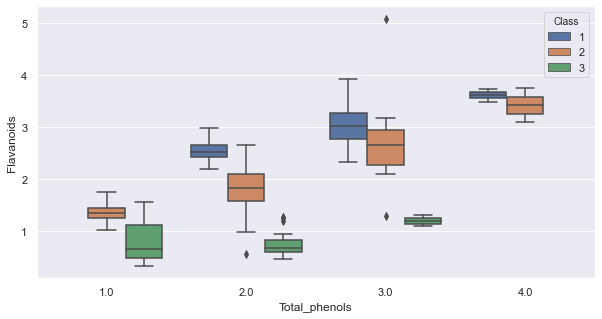

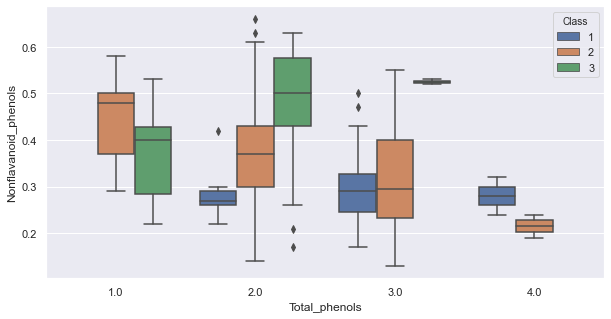

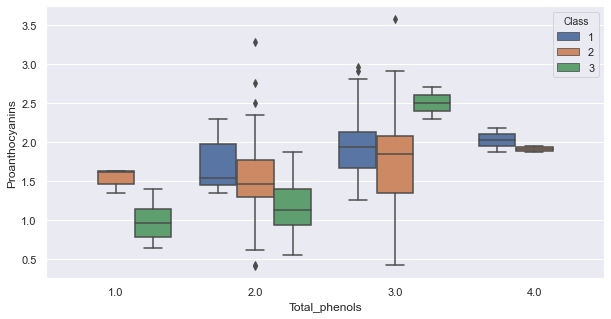

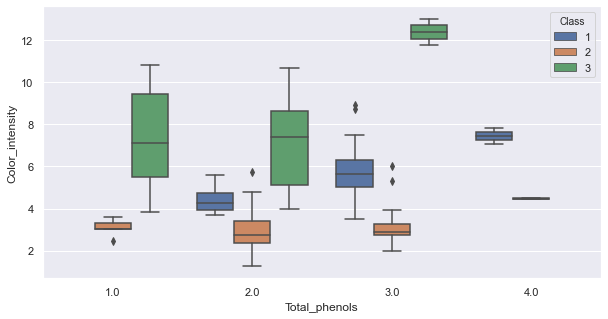

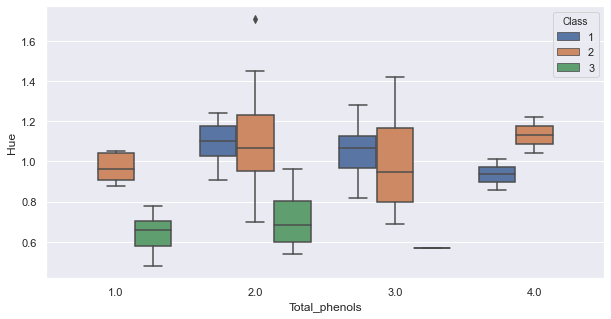

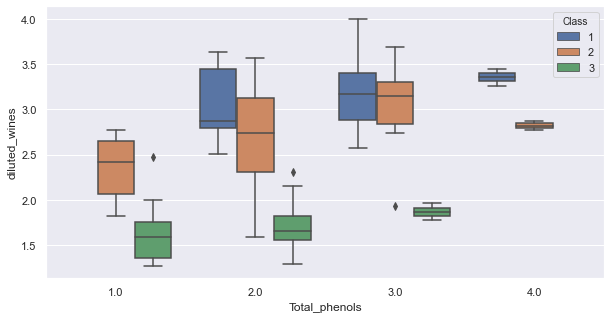

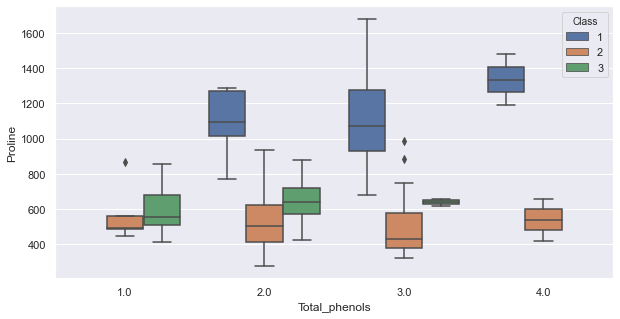

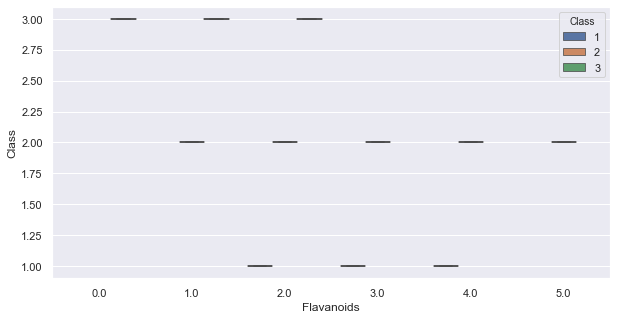

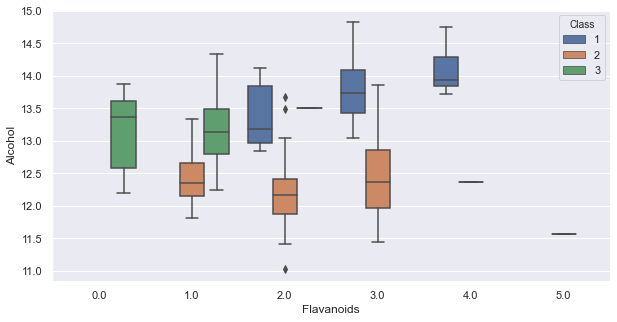

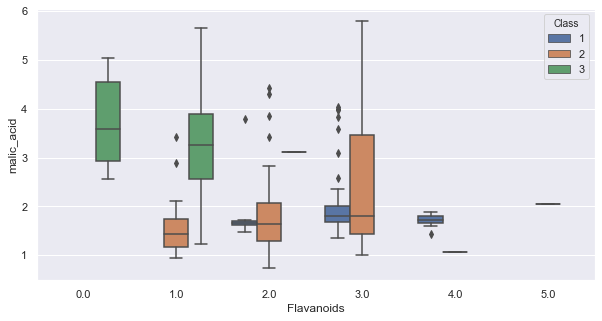

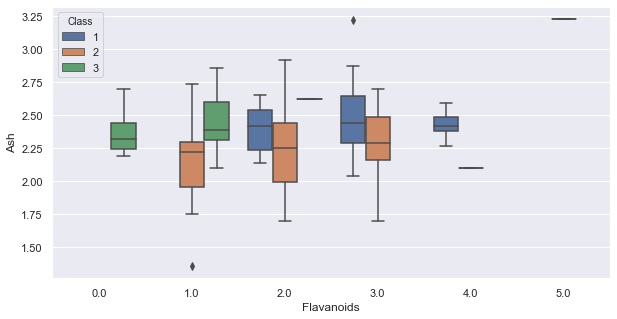

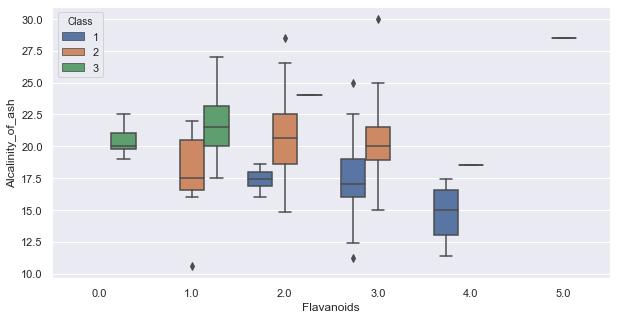

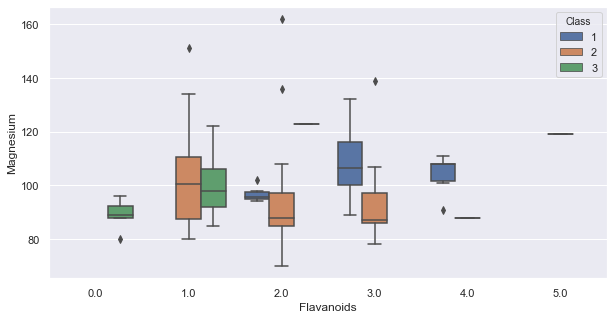

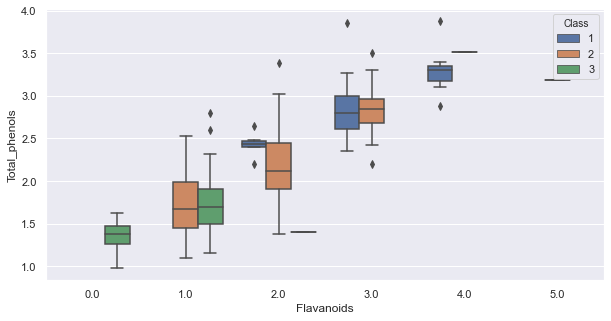

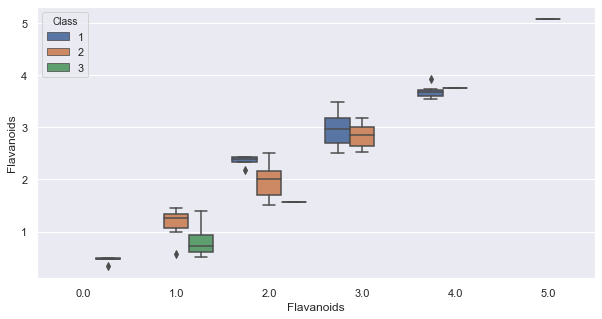

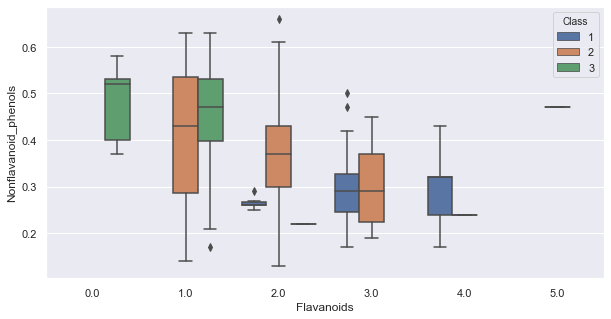

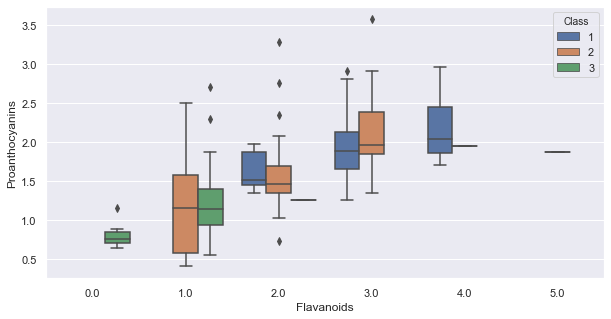

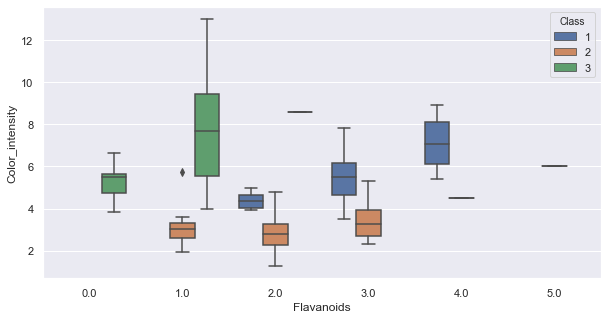

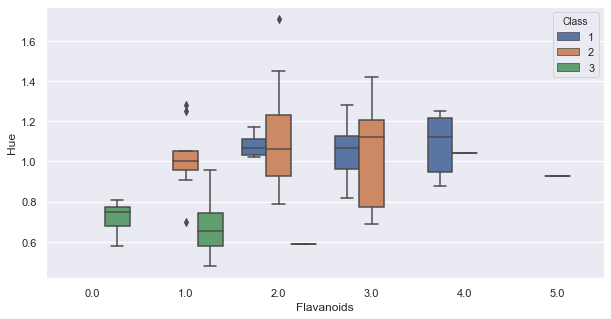

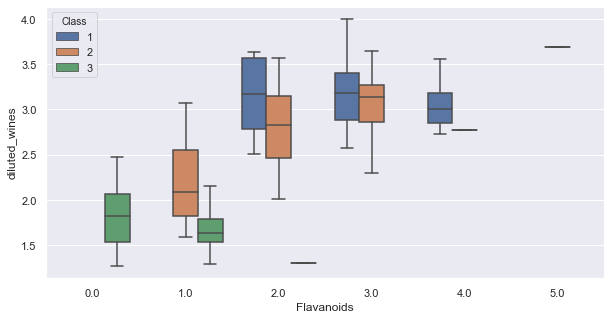

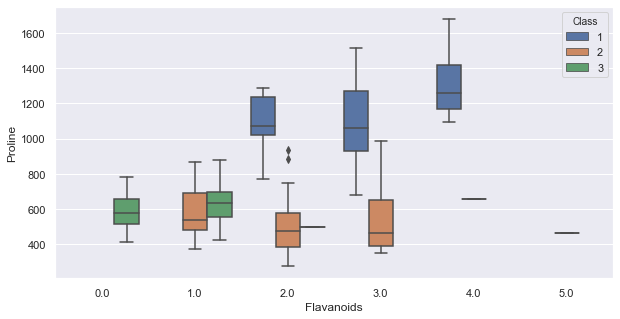

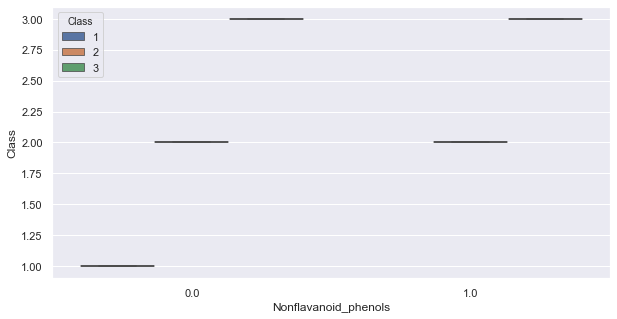

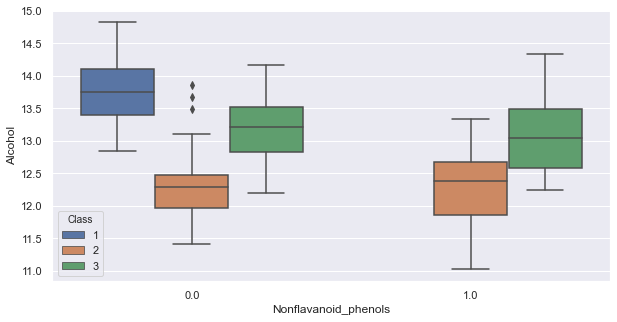

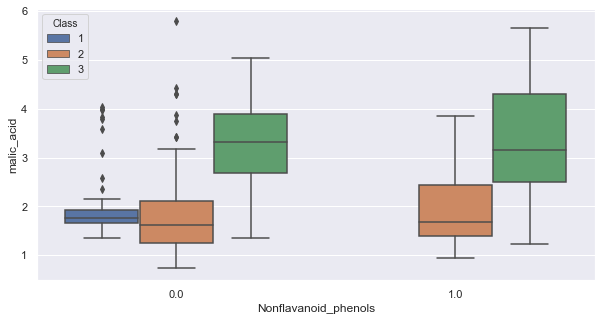

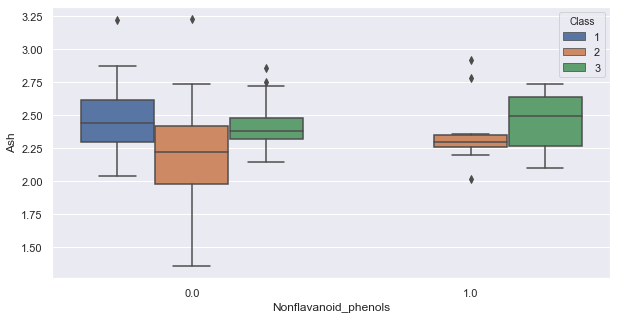

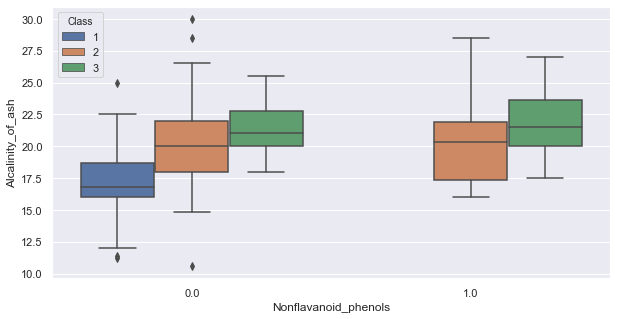

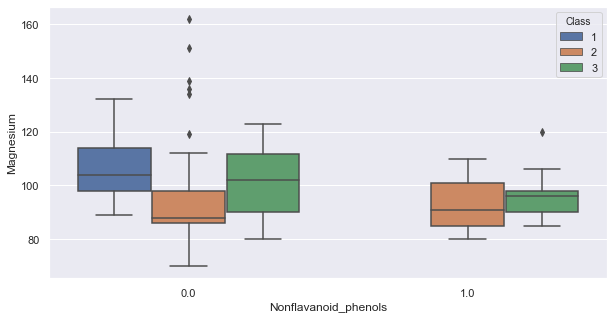

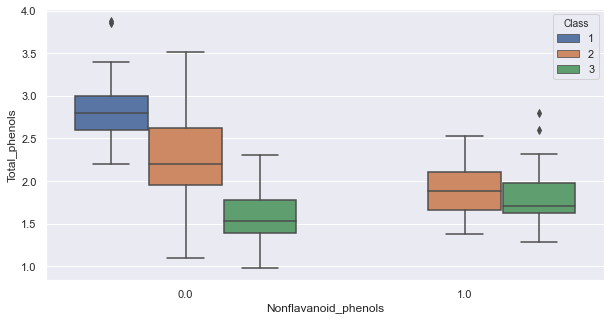

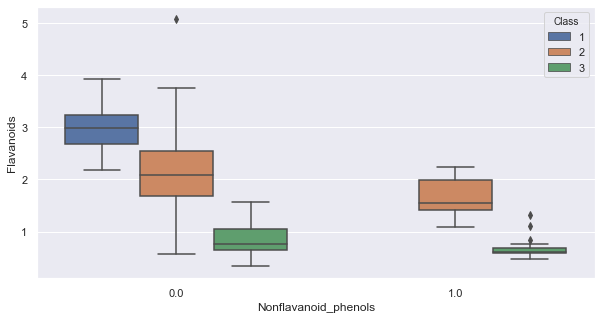

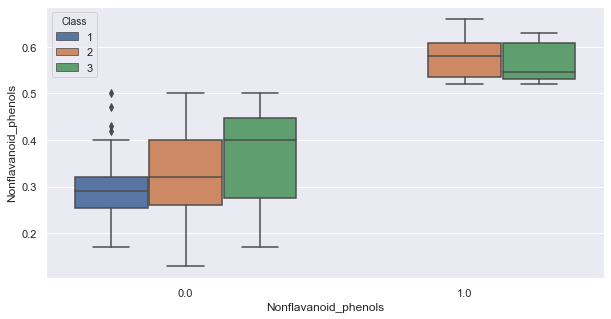

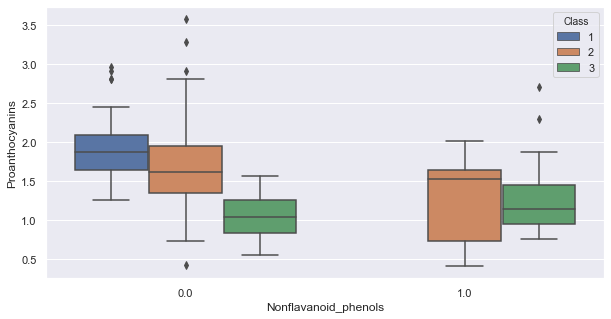

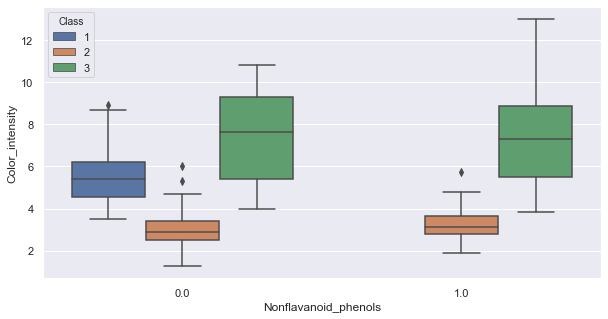

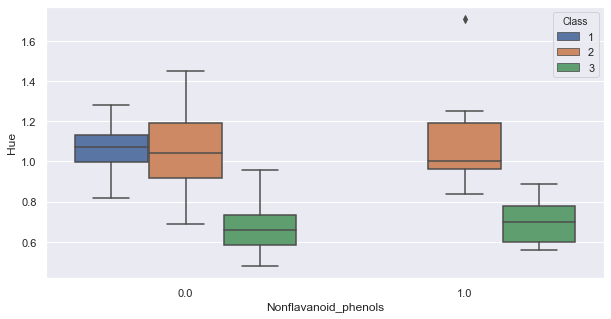

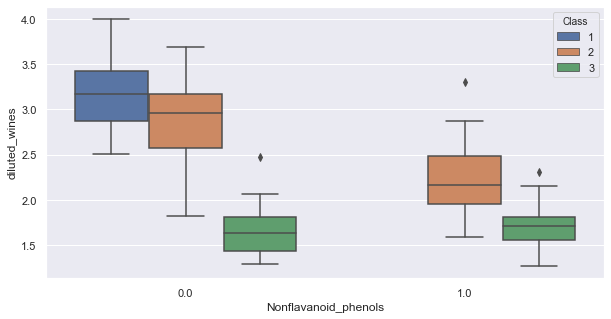

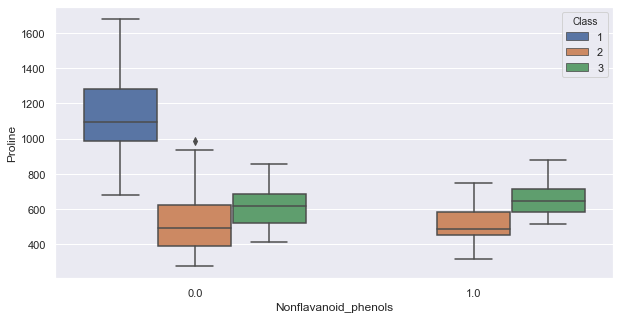

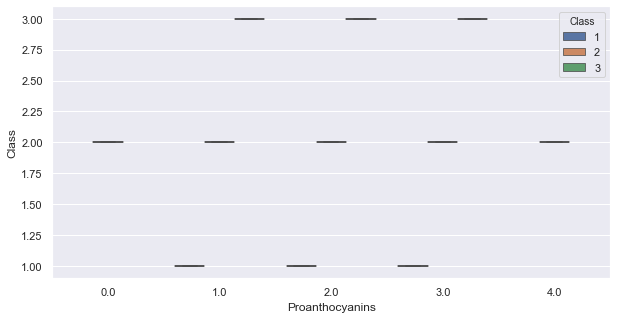

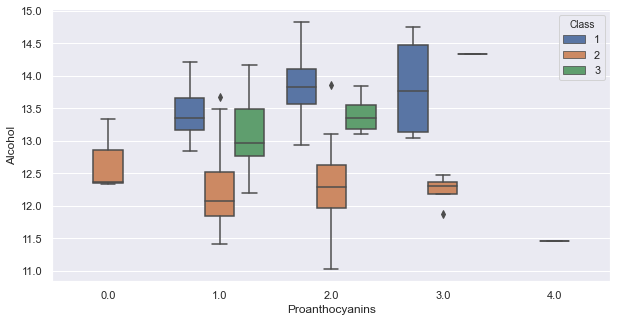

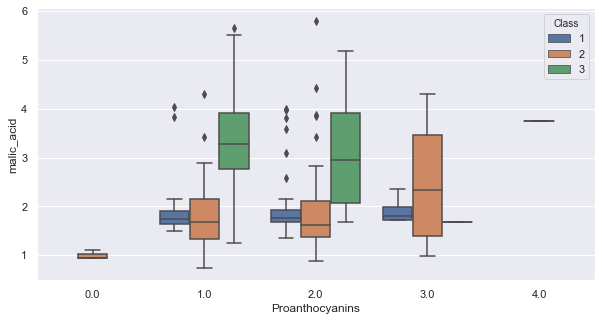

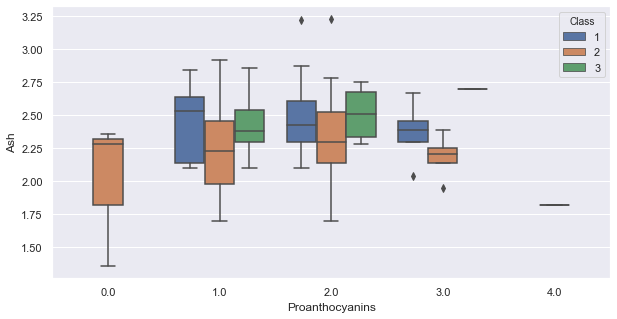

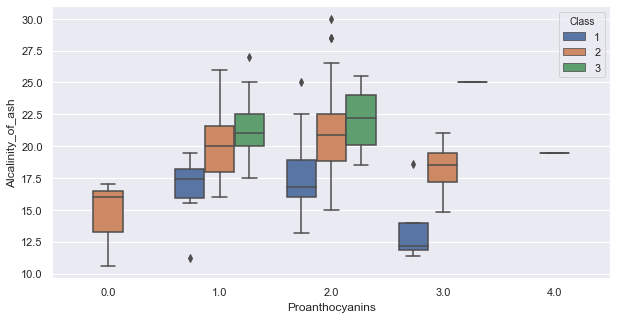

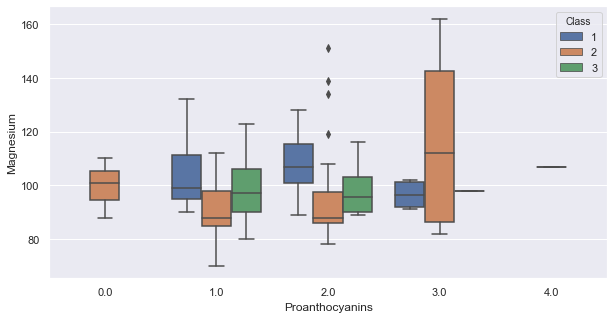

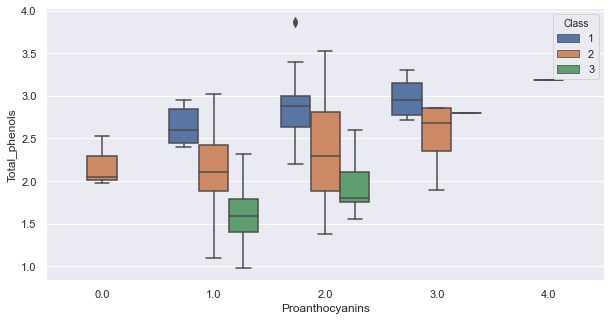

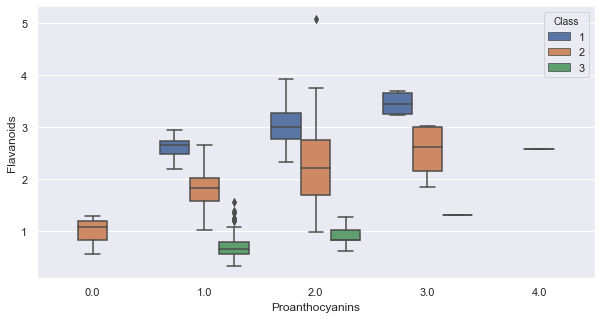

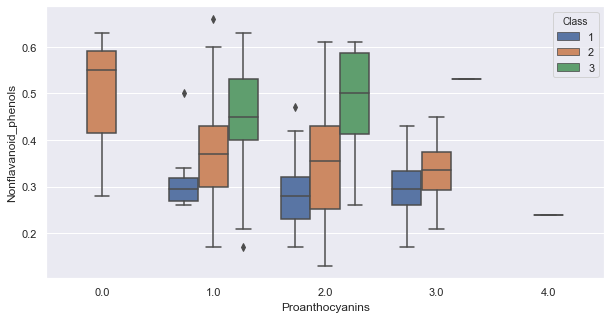

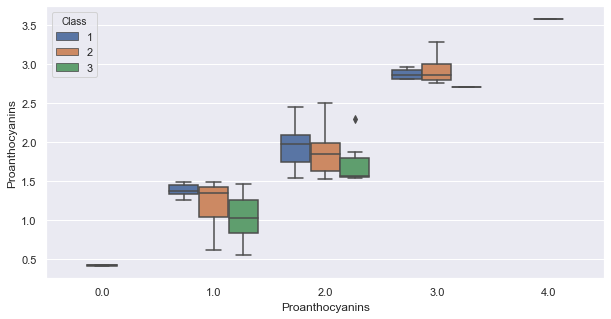

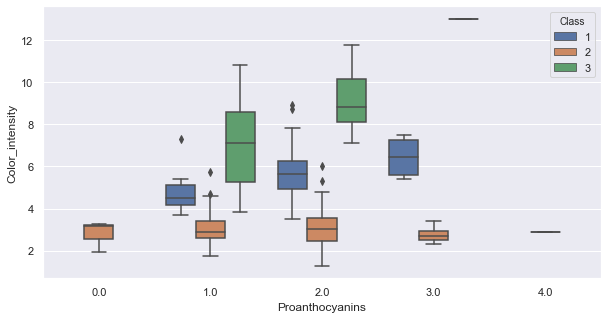

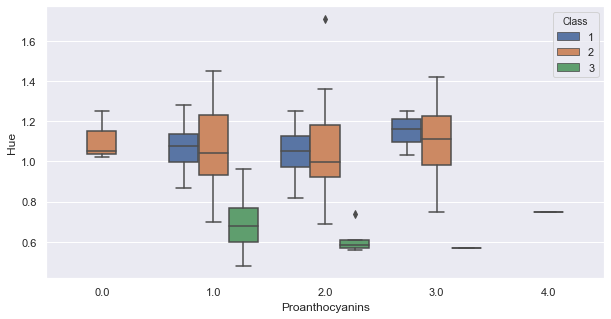

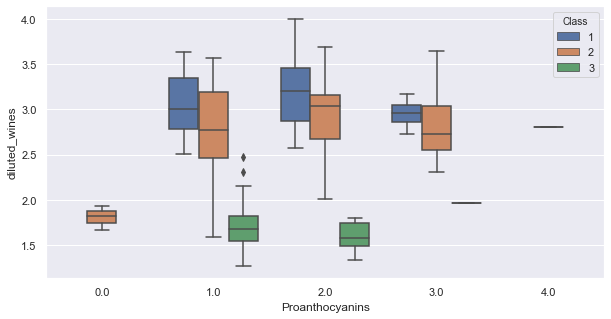

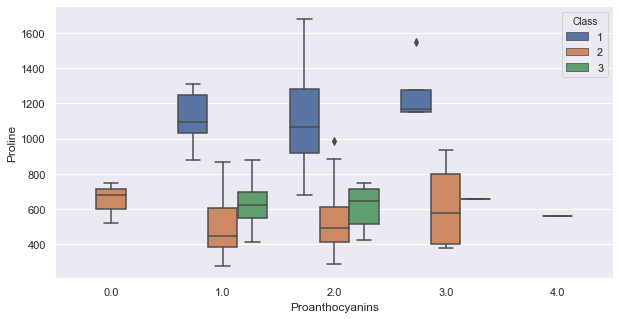

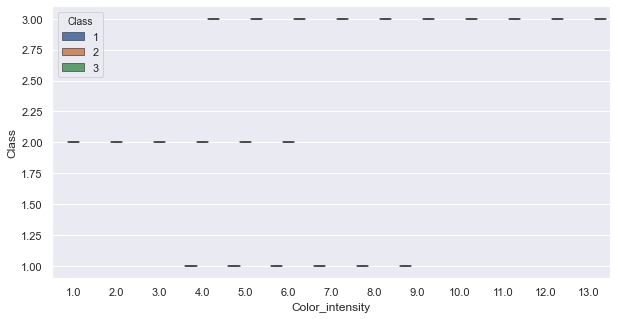

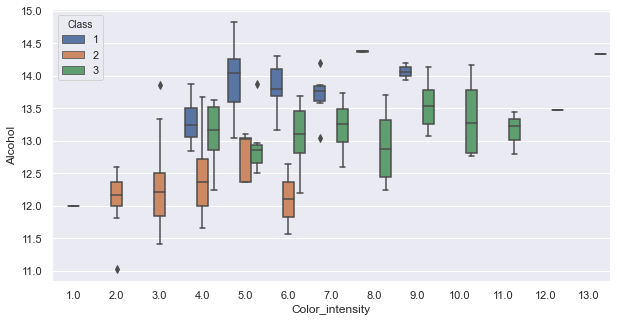

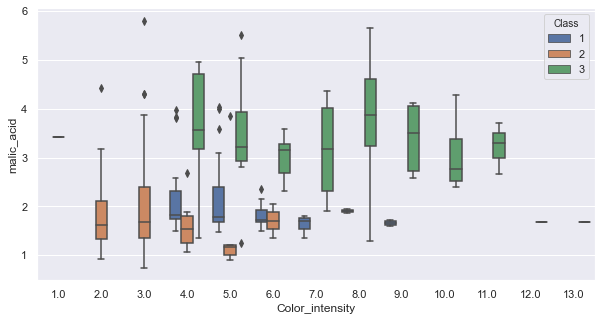

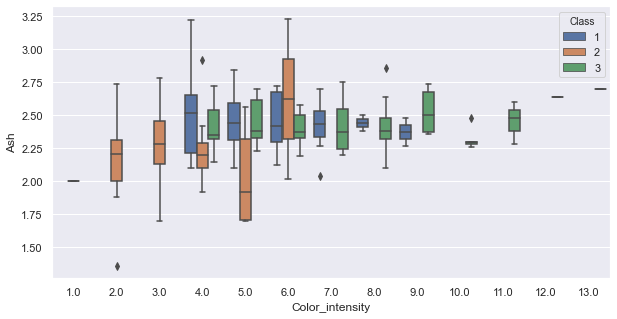

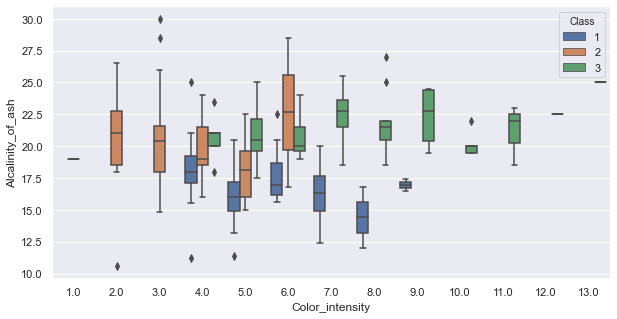

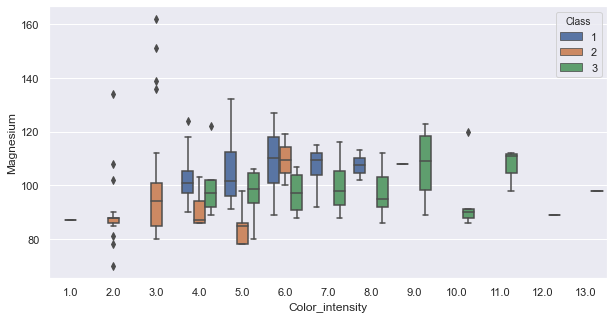

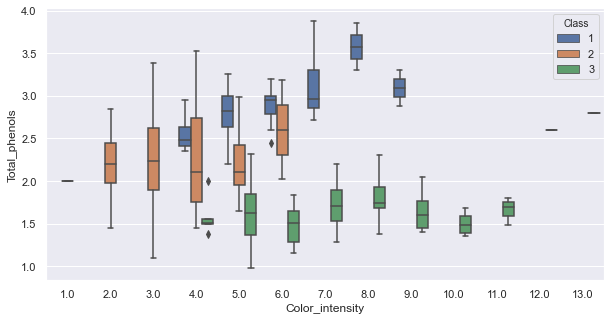

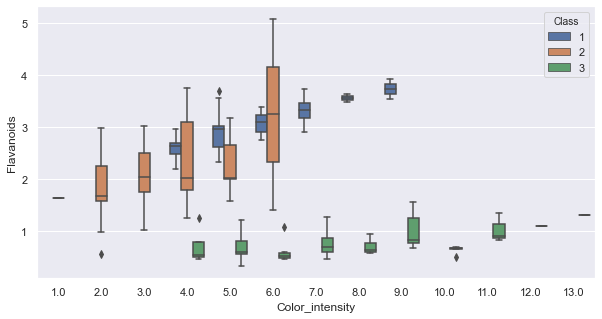

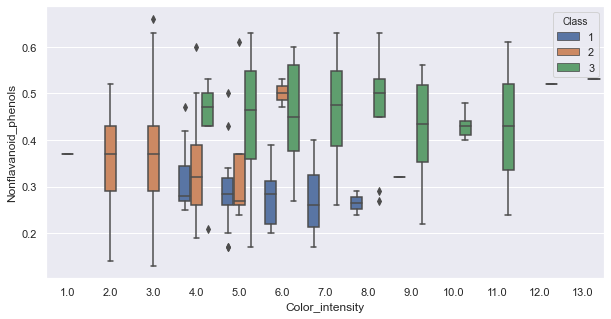

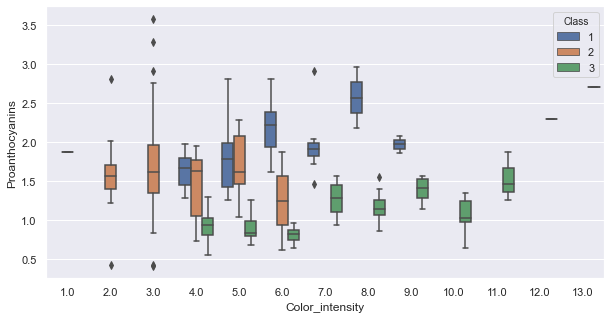

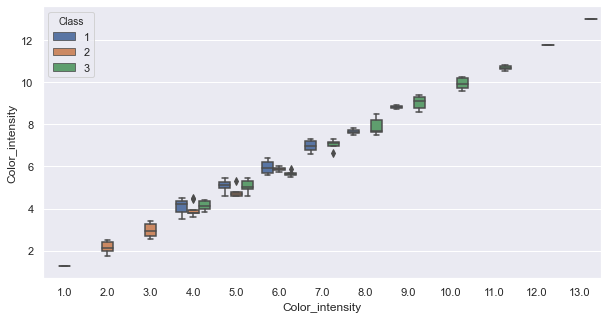

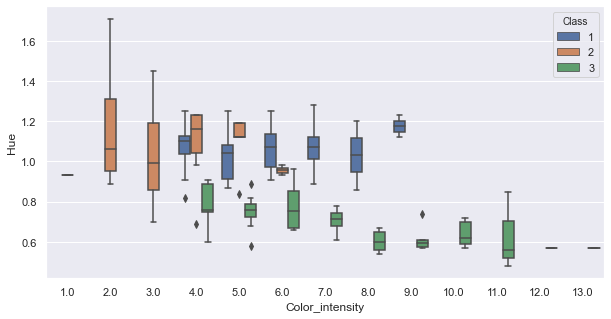

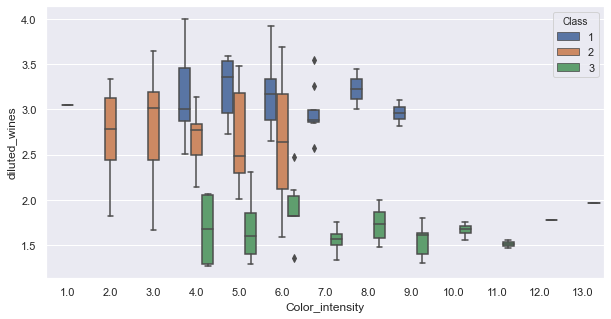

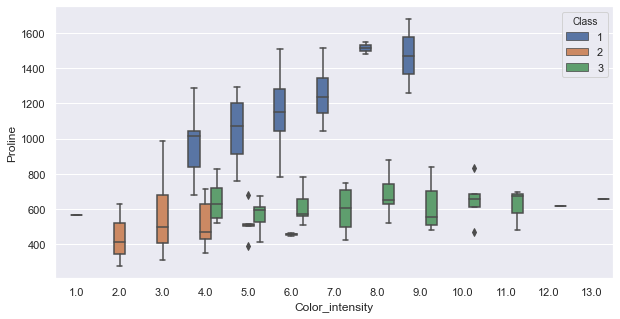

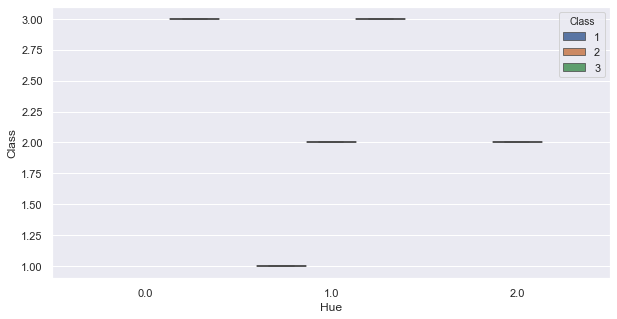

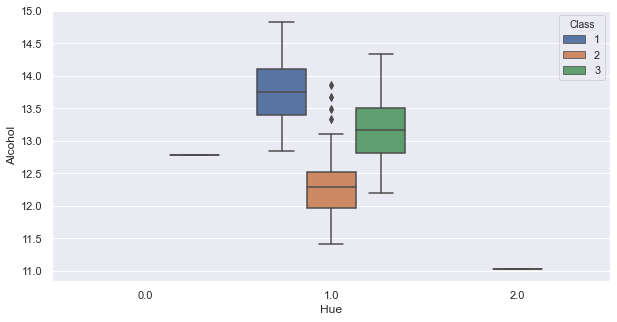

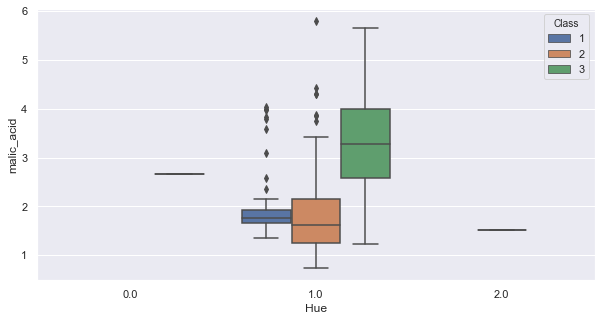

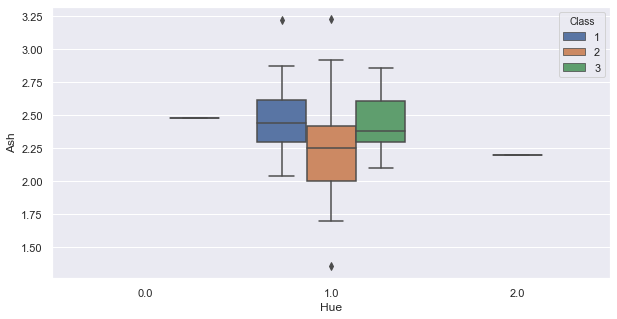

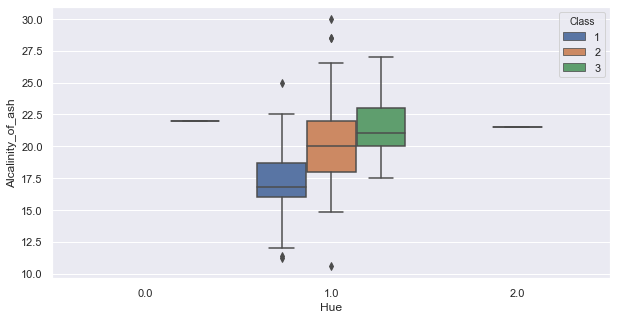

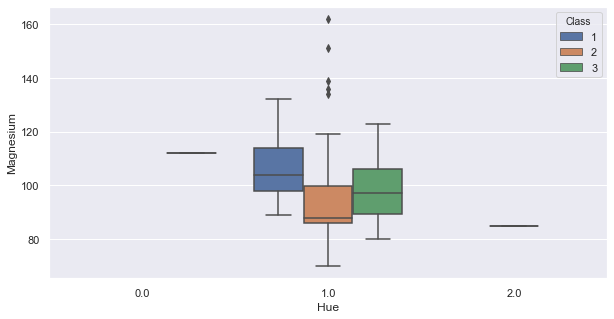

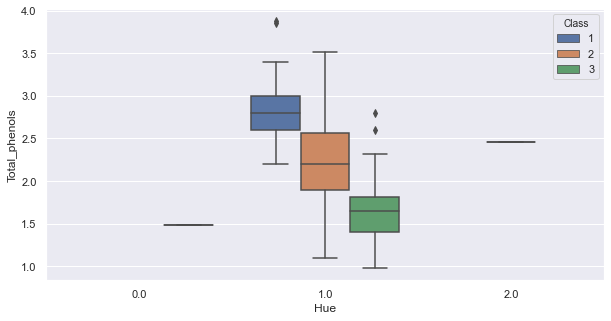

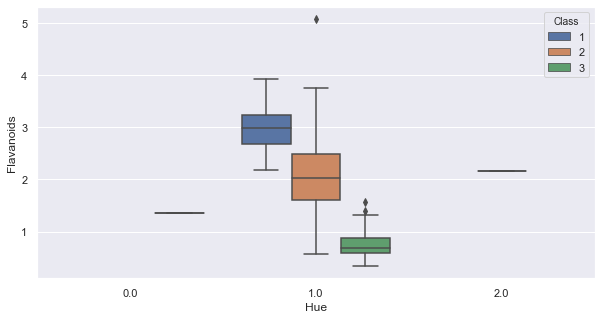

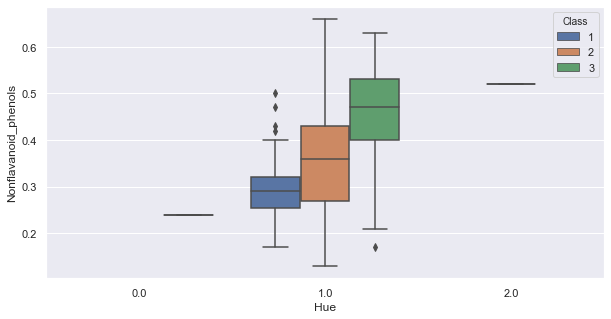

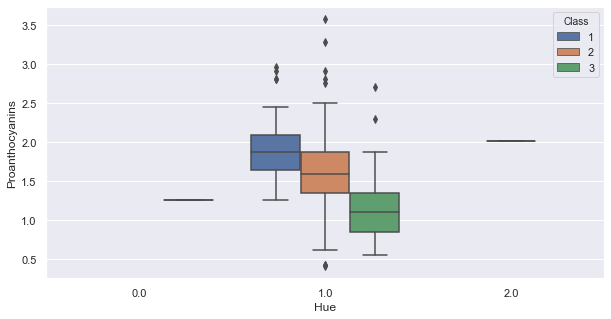

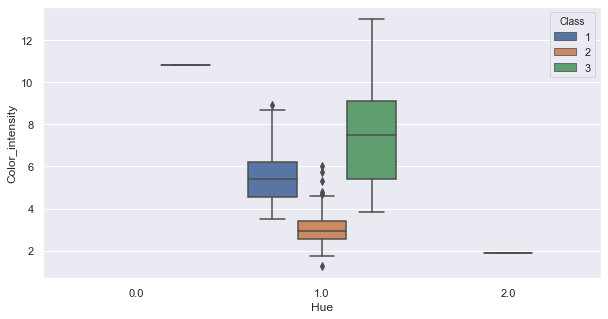

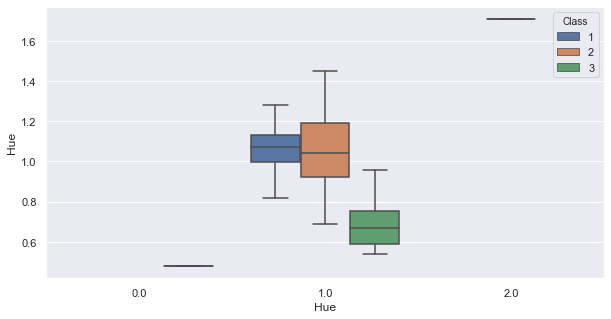

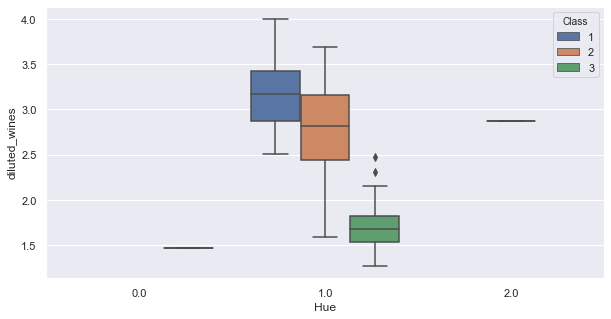

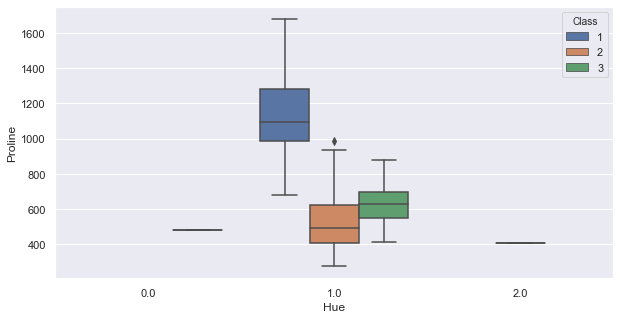

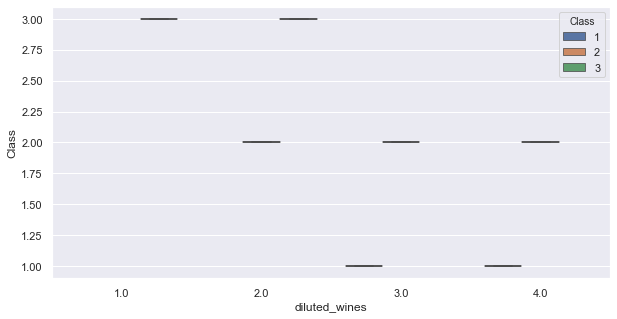

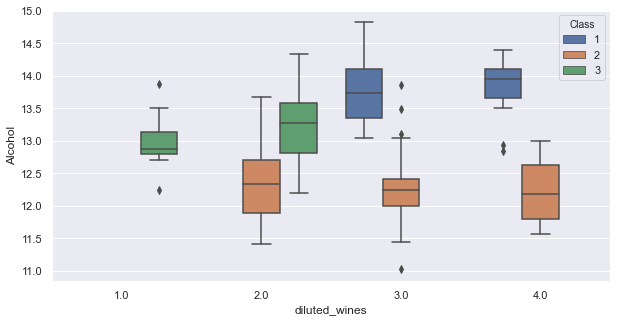

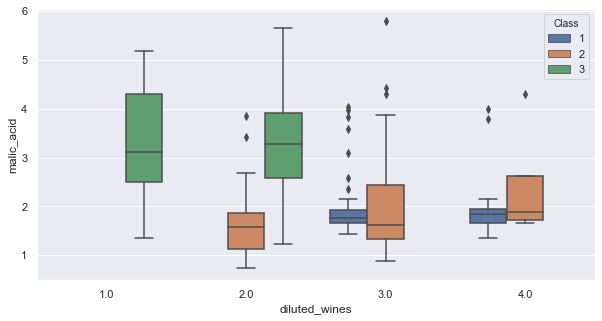

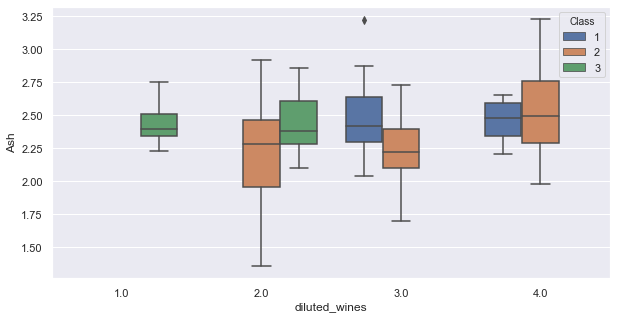

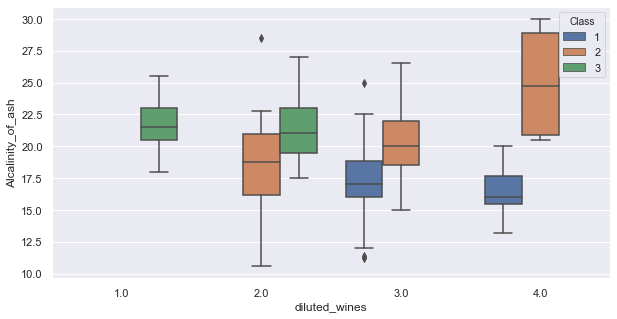

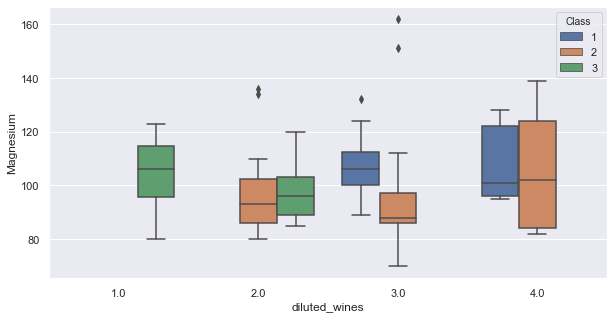

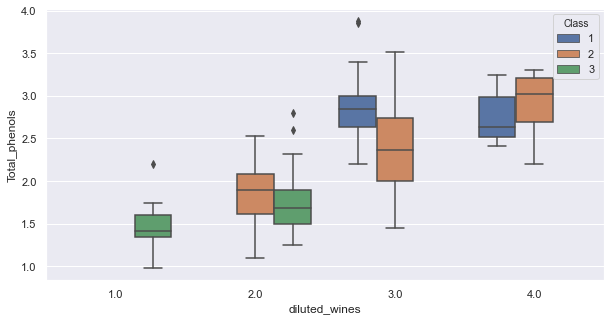

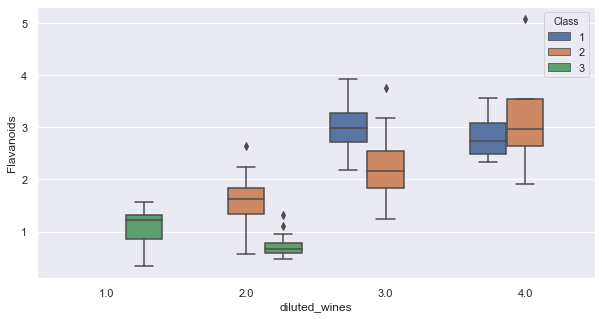

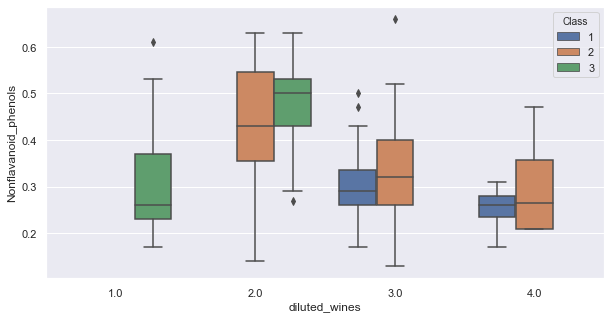

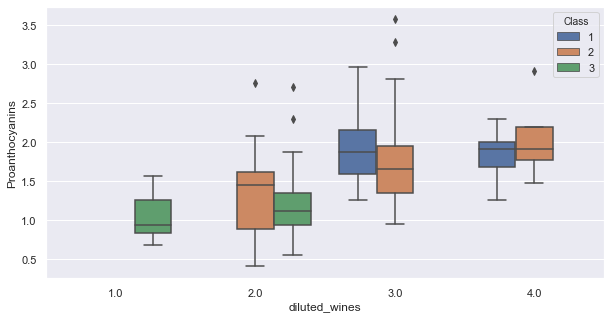

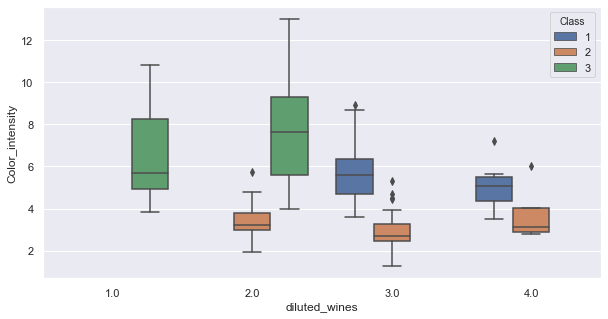

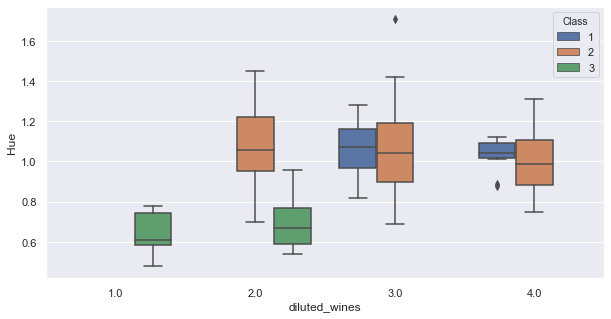

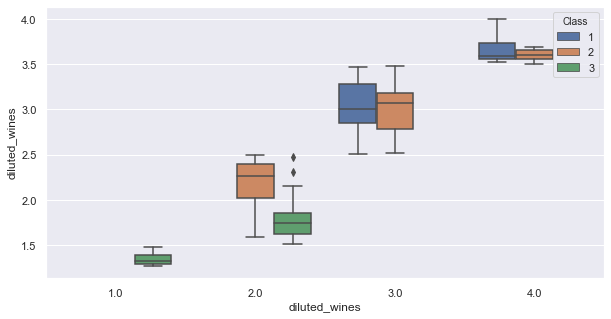

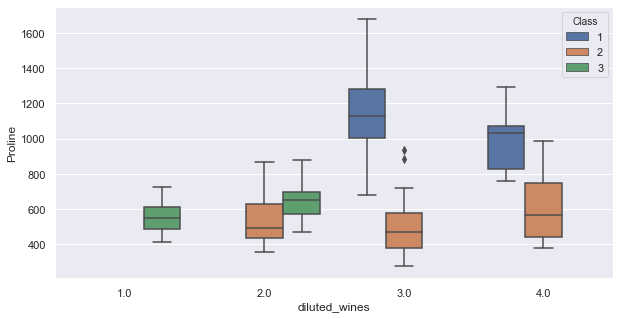

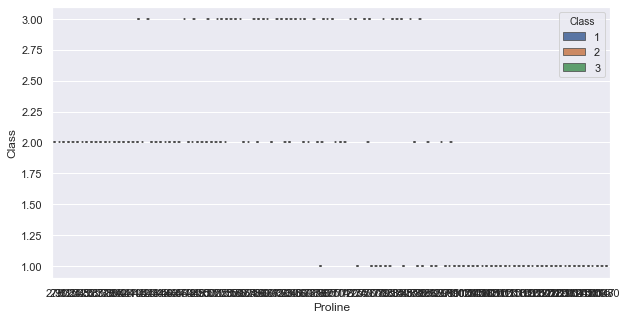

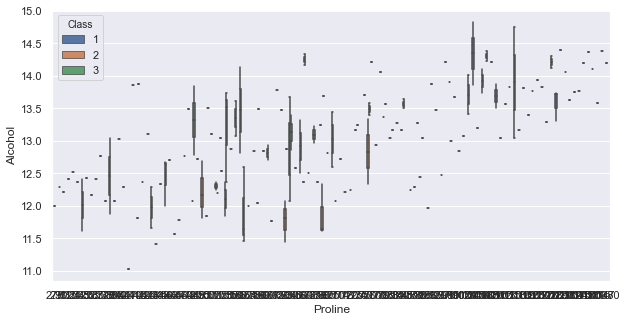

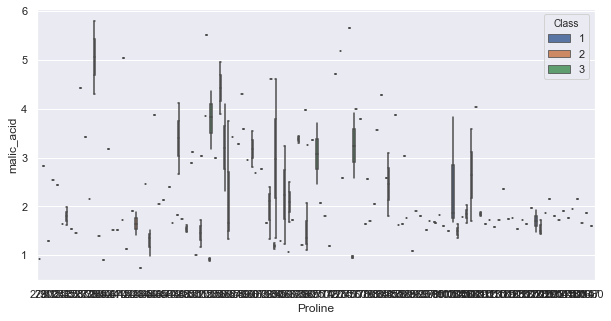

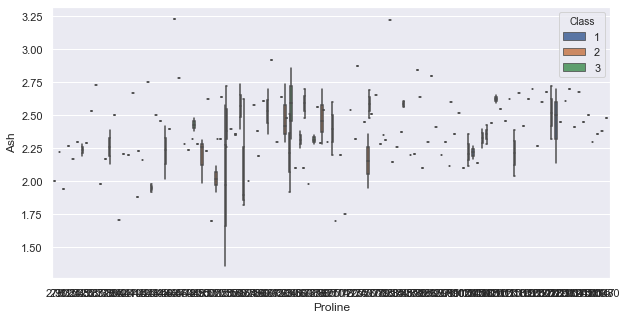

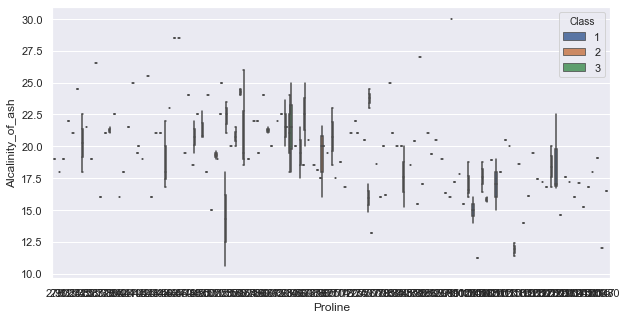

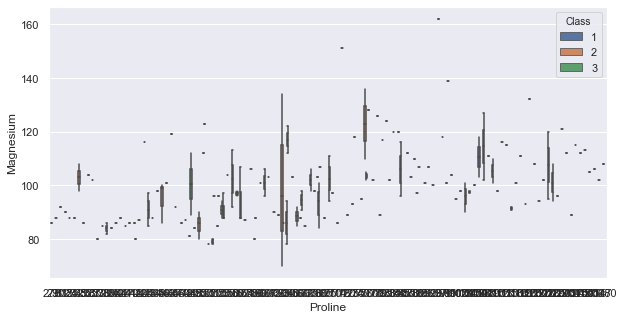

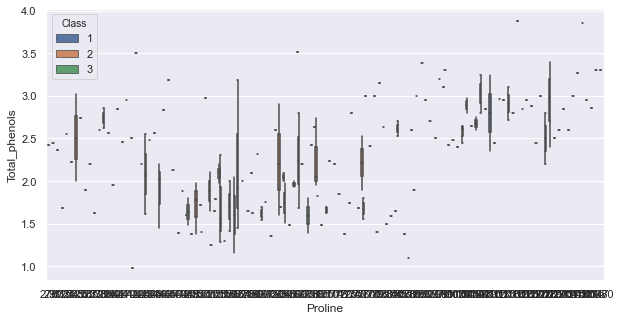

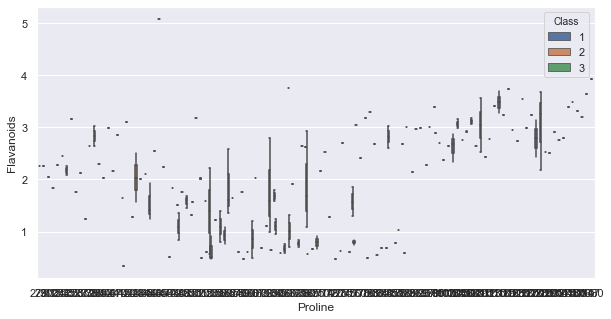

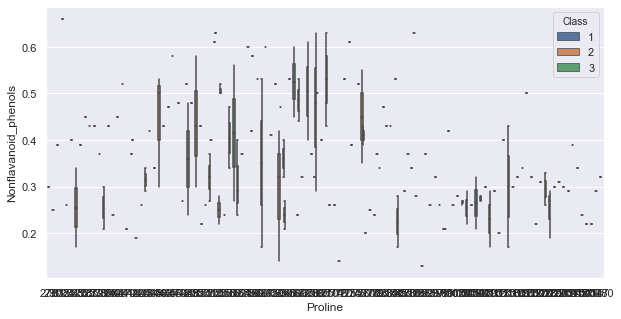

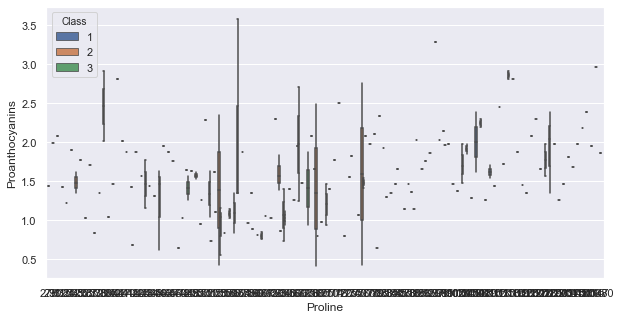

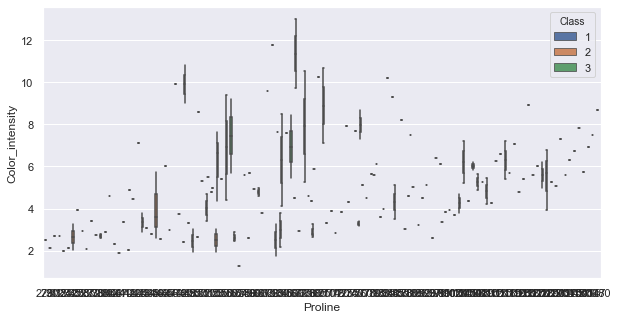

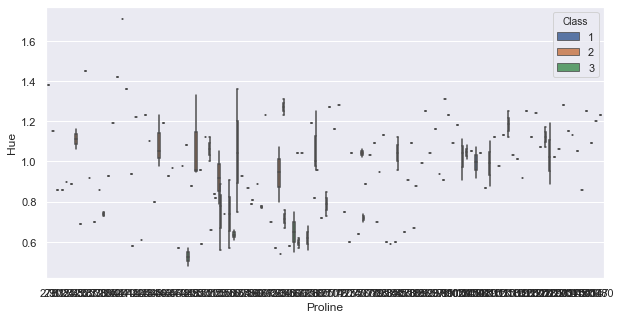

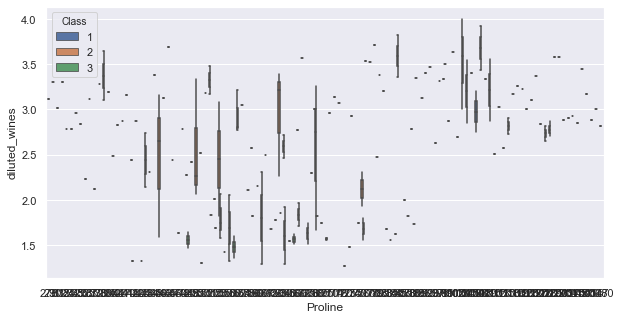

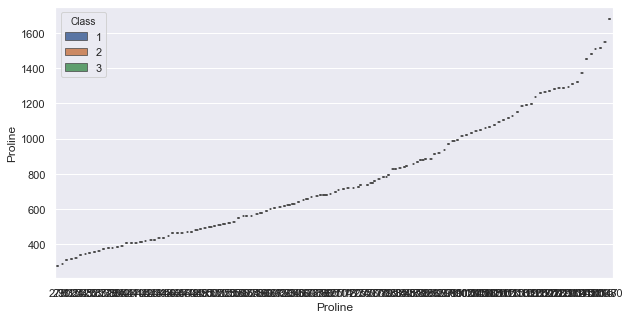

In [126]:
for col in df.columns:
    for i in df.columns:
        plt.figure(figsize=(10,5))
        sns.boxplot(x = round(df[col]), y = i, hue = 'Class',data=df)
        plt.show()

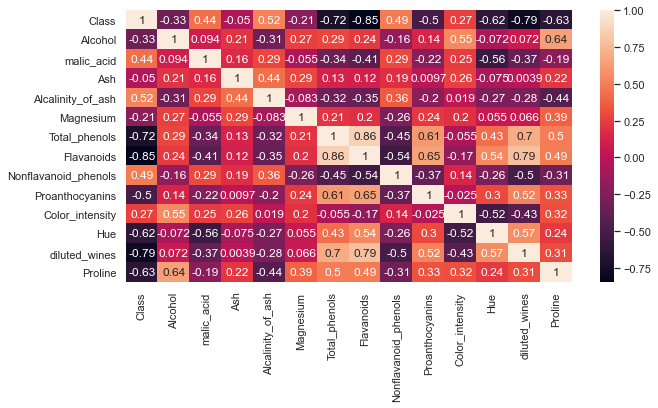

In [141]:
sns.heatmap(df.corr(), annot=True)

In [132]:
sc = StandardScaler()
sc_df = sc.fit_transform(df.drop(['Class'], axis=1))
sc_df = pd.DataFrame(data=sc_df, columns = df.drop(['Class'], axis=1).columns)
sc_df.head()

Alcohol  malic_acid       Ash  Alcalinity_of_ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   Color_intensity       Hue  diluted_wines   Proline  
0         0.251717  0.362177       1.847920  1.013009  
1        -0.293321  0.406051       1.113449  0.965242  
2         0.269020  0.318304       0.788587  1.395148  
3         1.186068 -0.427544       1.184071  2.334574  
4        -0.319276  0.362177       0.449601 -0.037874

In [139]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(sc_df, df['Class'])
dt.score(sc_df, df['Class'])

1.0